In [1]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
import gc

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
data = pd.read_csv(r'C:\Users\Hilbert\Documents\OpenClassRoom\openclassroom\datasets\test.csv')

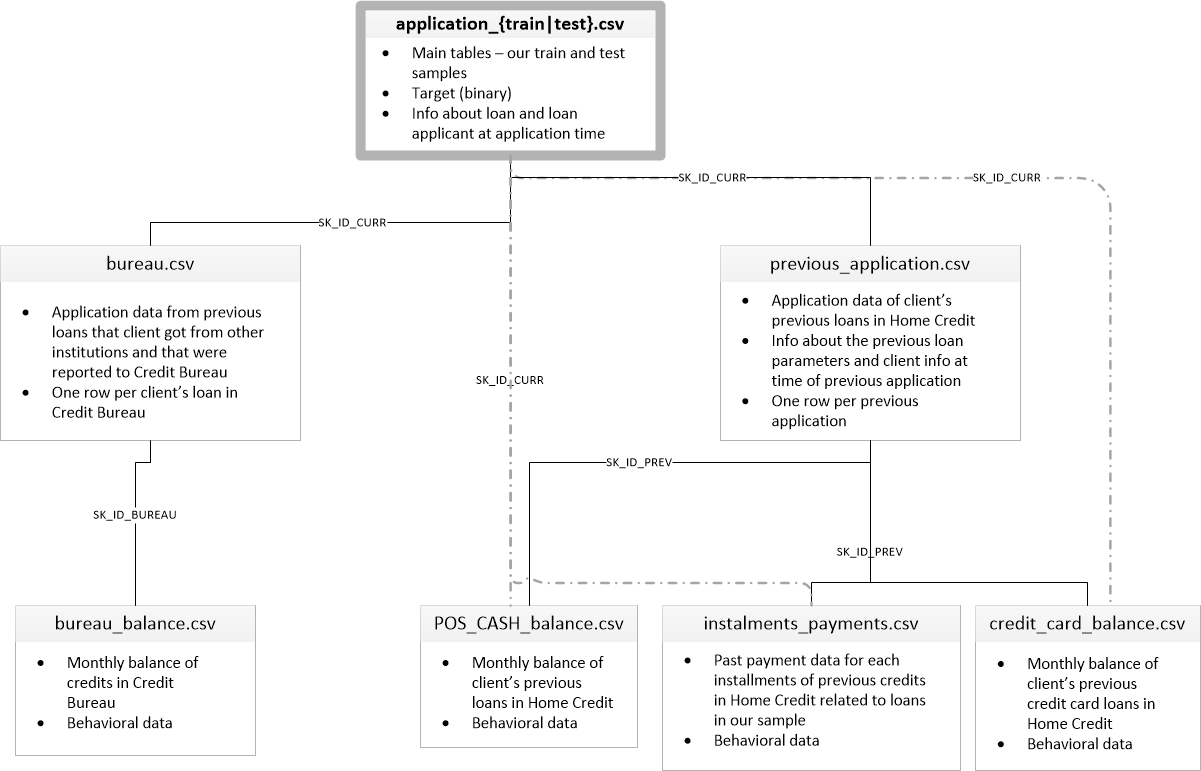

Travail de la donnée grandement influencé par le kernel suivant : https://www.kaggle.com/code/gorilla1212/notebookb37ce29d18

In [3]:

dossier = r'Projet+Mise+en+prod+-+home-credit-default-risk'

dfs = []
for fichier in os.listdir(dossier):
    if fichier.endswith('.csv'):
        chemin_fichier = os.path.join(dossier, fichier)
        df = pd.read_csv(chemin_fichier, encoding='latin-1')
        dfs.append(df)



In [4]:
print('nombre de datasets chargés : ',len(dfs))

nombre de datasets chargés :  10


In [5]:
test=dfs[0] # dataset de test

# Exploration du dataset Train

## Train colonnes et sélection

In [6]:
train=dfs[1]
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
for i in train.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

SK_ID_CURR : Identifiant unique pour chaque demande de crédit.  
TARGET : Indicateur binaire indiquant si le client a eu des difficultés de remboursement (1) ou non (0).  
NAME_CONTRACT_TYPE : Type de contrat du prêt.  
CODE_GENDER : Genre du client.  
FLAG_OWN_CAR : Indique si le client possède une voiture (1) ou non (0).  
FLAG_OWN_REALTY : Indique si le client possède une propriété immobilière (1) ou non (0).  
CNT_CHILDREN : Nombre d'enfants du client.  
AMT_INCOME_TOTAL : Revenu total du client.  
AMT_CREDIT : Montant du crédit demandé par le client.  
AMT_ANNUITY : Montant de l'annuité du crédit.  
AMT_GOODS_PRICE : Prix des biens pour lesquels le crédit est demandé.  
NAME_TYPE_SUITE : Type de suite de noms pour le client.  
NAME_INCOME_TYPE : Source de revenu du client.  
NAME_EDUCATION_TYPE : Niveau d'éducation du client.  
NAME_FAMILY_STATUS : Statut familial du client.  
NAME_HOUSING_TYPE : Type de logement du client.  
REGION_POPULATION_RELATIVE : Population relative de la région où vit le client.  
DAYS_BIRTH : Âge du client en jours négatifs.  
DAYS_EMPLOYED : Nombre de jours depuis le début de l'emploi du client (positif si actif, négatif sinon).  
DAYS_REGISTRATION : Nombre de jours depuis l'enregistrement de la demande.  
DAYS_ID_PUBLISH : Nombre de jours depuis la publication de l'identification du client.  
OWN_CAR_AGE : Âge de la voiture du client.  
FLAG_MOBIL : Indique si le client a un téléphone mobile (1) ou non (0).  
FLAG_EMP_PHONE : Indique si le client a un téléphone professionnel (1) ou non (0).  
FLAG_WORK_PHONE : Indique si le client a un téléphone professionnel pour le travail (1) ou non (0).  
FLAG_CONT_MOBILE : Indique si le client a un téléphone mobile (1) ou non (0).  
FLAG_PHONE : Indique si le client a un téléphone (1) ou non (0).  
FLAG_EMAIL : Indique si le client a fourni une adresse e-mail (1) ou non (0).  
OCCUPATION_TYPE : Type d'occupation du client.  
CNT_FAM_MEMBERS : Nombre de membres de la famille.  
REGION_RATING_CLIENT : Évaluation du client basée sur la région.  
REGION_RATING_CLIENT_W_CITY : Évaluation du client basée sur la région avec la ville.  
WEEKDAY_APPR_PROCESS_START : Jour de la semaine où la demande a été traitée.  
HOUR_APPR_PROCESS_START : Heure du jour où la demande a été traitée.  
REG_REGION_NOT_LIVE_REGION : Indique si la région de l'adresse permanente du client ne correspond pas à la région où il vit.  
REG_REGION_NOT_WORK_REGION : Indique si la région de l'adresse permanente du client ne correspond pas à la région où il travaille.  
LIVE_REGION_NOT_WORK_REGION : Indique si la région où le client vit ne correspond pas à la région où il travaille.  
REG_CITY_NOT_LIVE_CITY : Indique si la ville de l'adresse permanente du client ne correspond pas à la ville où il vit.  
REG_CITY_NOT_WORK_CITY : Indique si la ville de l'adresse permanente du client ne correspond pas à la ville où il travaille.  
LIVE_CITY_NOT_WORK_CITY : Indique si la ville où le client vit ne correspond pas à la ville où il travaille.  
ORGANIZATION_TYPE : Type d'organisation où le client travaille.  
EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 : Indicateurs normalisés externes pour évaluer la fiabilité du client.  
APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG : Moyenne des caractéristiques relatives au logement.
APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE : Mode des caractéristiques relatives au logement.
APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI : Médiane des caractéristiques relatives au logement.  
FONDKAPREMONT_MODE : Mode du fonds du pré-montage.  
HOUSETYPE_MODE : Mode du type de maison.  
TOTALAREA_MODE : Mode de la superficie totale.  
WALLSMATERIAL_MODE : Mode du matériau des murs.  
EMERGENCYSTATE_MODE : Mode de l'état d'urgence.  
OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE : Observations et défauts dans le cercle social du client.  
DAYS_LAST_PHONE_CHANGE : Nombre de jours depuis le dernier changement de numéro de téléphone.  
FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21 : Indicateurs pour les documents fournis.  
AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR : Nombre de demandes de crédit auprès du bureau de crédit au cours de différentes périodes.  

In [8]:
train['NAME_HOUSING_TYPE'] # exemple de colonne catégorique

0         House / apartment
1         House / apartment
2         House / apartment
3         House / apartment
4         House / apartment
                ...        
307506         With parents
307507    House / apartment
307508    House / apartment
307509    House / apartment
307510    House / apartment
Name: NAME_HOUSING_TYPE, Length: 307511, dtype: object

In [9]:
train['EXT_SOURCE_1'] # exemple de colonne numérique

0         0.083037
1         0.311267
2              NaN
3              NaN
4              NaN
            ...   
307506    0.145570
307507         NaN
307508    0.744026
307509         NaN
307510    0.734460
Name: EXT_SOURCE_1, Length: 307511, dtype: float64

### Colonne TARGET

Une variable à expliquer/predire TARGET. Cet indicateur binaire précise si le client a eu des difficultés de remboursement (1) ou non (0) 

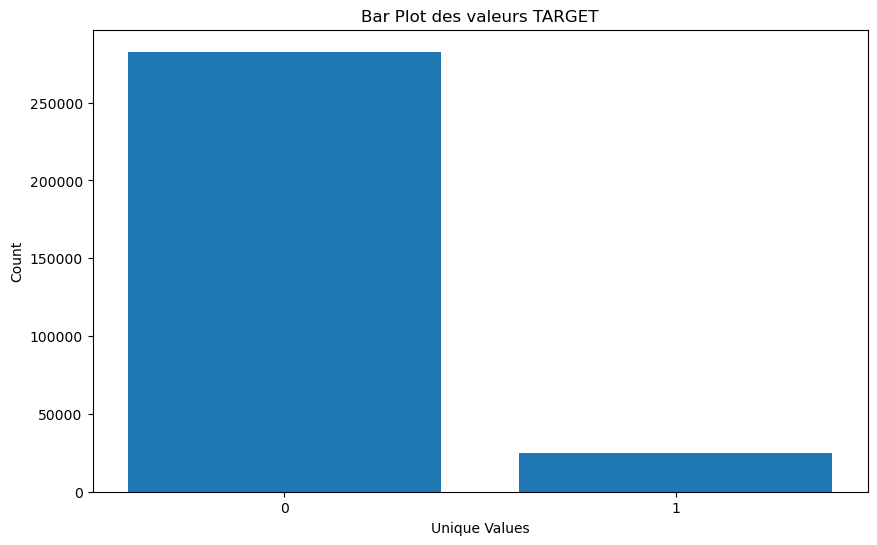

In [10]:
# plot de proportion de 0 et 1 dans le train

value_counts =train['TARGET'].value_counts()

unique_values = value_counts.index
counts = value_counts.values

plt.figure(figsize=(10, 6))
plt.bar(range(len(unique_values)), counts, tick_label=unique_values)
plt.title('Bar Plot des valeurs TARGET')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

### nan values

In [11]:
missing_values = train.isna().sum()

missing_columns_df = missing_values[missing_values > 0].to_frame()

missing_columns_df.columns = ['Missing Values']

In [12]:
missing_columns_df.sort_values(by='Missing Values', ascending=False)


,Missing Values
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MEDI,213514
NONLIVINGAPARTMENTS_MODE,213514
...,...
EXT_SOURCE_2,660
AMT_GOODS_PRICE,278
AMT_ANNUITY,12
CNT_FAM_MEMBERS,2


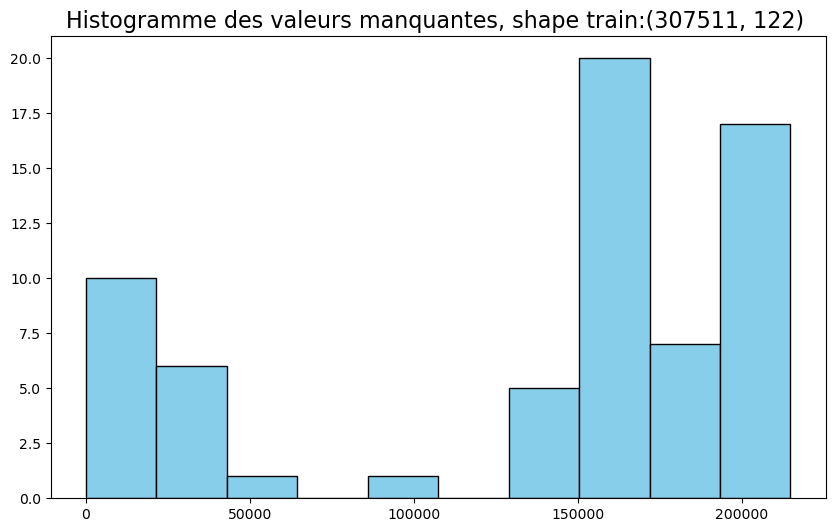

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
missing_columns_df.hist(ax=ax, color='skyblue', edgecolor='black', grid=False)
shape=train.shape
plt.title(f'Histogramme des valeurs manquantes, shape train:{shape} ', fontsize=16)

plt.show() 

### Colonnes numeriques

In [14]:
print(f'shape du train {train.shape}')

shape du train (307511, 122)


In [15]:
print('nombre de colonnes numeriques: ',len(train.select_dtypes(include=['int', 'float']).columns))

nombre de colonnes numeriques:  106


In [16]:
numeric_columns = train.select_dtypes(include=['int', 'float'])
numeric_columns

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
selected_columns = numeric_columns.columns[~numeric_columns.columns.isin(['SK_ID_CURR', 'TARGET'])]
numeric_columns[selected_columns].describe().round(2)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,...,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,0.42,1.687979e+05,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,...,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,0.72,2.371231e+05,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,...,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,0.00,2.565000e+04,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,-24672.00,-7197.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.125000e+05,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,-7479.50,-4299.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,1.471500e+05,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,-4504.00,-3254.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,1.00,2.025000e+05,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,-2010.00,-1720.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,19.00,1.170000e+08,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,0.00,0.00,...,1.00,1.00,1.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00


In [18]:
nc=numeric_columns.drop(['SK_ID_CURR','TARGET','CNT_CHILDREN','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1).describe().round(2)

In [19]:
nc

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON
count,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,...,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,265992.00
mean,1.687979e+05,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,...,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.27
std,2.371231e+05,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,...,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.92
min,2.565000e+04,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,-24672.00,-7197.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4292.00,0.00
25%,1.125000e+05,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,-7479.50,-4299.00,5.00,...,0.05,0.00,0.00,0.04,0.00,0.00,0.00,0.00,-1570.00,0.00
50%,1.471500e+05,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,-4504.00,-3254.00,9.00,...,0.07,0.00,0.00,0.07,0.00,0.00,0.00,0.00,-757.00,0.00
75%,2.025000e+05,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,-2010.00,-1720.00,15.00,...,0.13,0.00,0.03,0.13,2.00,0.00,2.00,0.00,-274.00,0.00
max,1.170000e+08,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,0.00,0.00,91.00,...,1.00,1.00,1.00,1.00,348.00,34.00,344.00,24.00,0.00,27.00


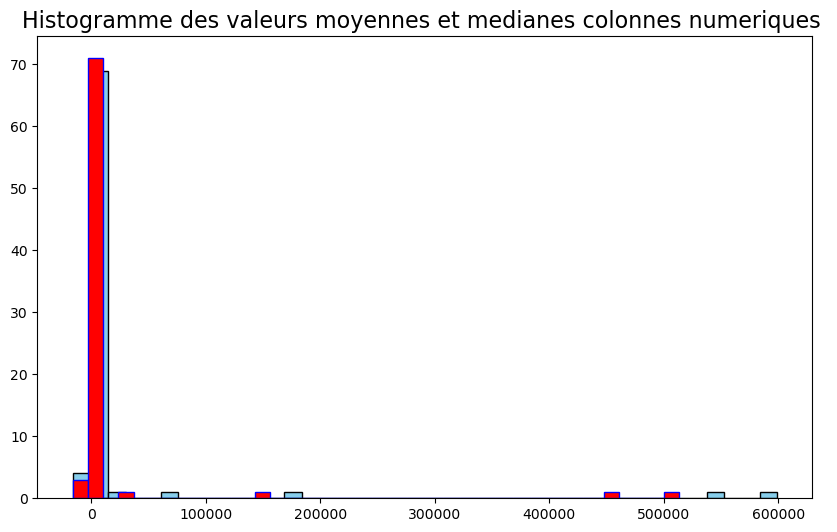

In [20]:

fig, ax = plt.subplots(figsize=(10, 6))
nc.loc['mean'].hist(ax=ax, color='skyblue', edgecolor='black', grid=False,bins=40)
nc.loc['50%'].hist(ax=ax, color='red', edgecolor='blue', grid=False,bins=40)

shape=train.shape
plt.title(f'Histogramme des valeurs moyennes et medianes colonnes numeriques ', fontsize=16)
plt.show() 

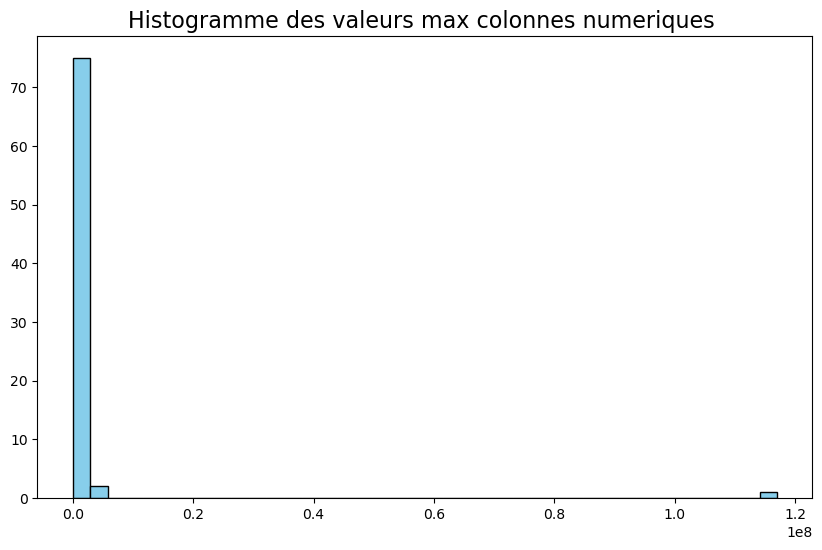

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
nc.loc['max'].hist(ax=ax, color='skyblue', edgecolor='black', grid=False,bins=40)
shape=train.shape
plt.title(f'Histogramme des valeurs max colonnes numeriques ', fontsize=16)
plt.show() 

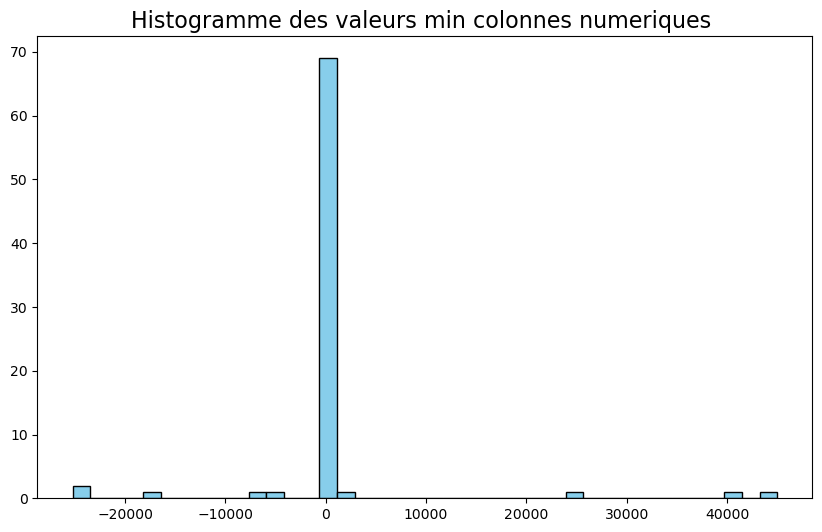

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
nc.loc['min'].hist(ax=ax, color='skyblue', edgecolor='black', grid=False,bins=40)
shape=train.shape
plt.title(f'Histogramme des valeurs min colonnes numeriques ', fontsize=16)
plt.show() 

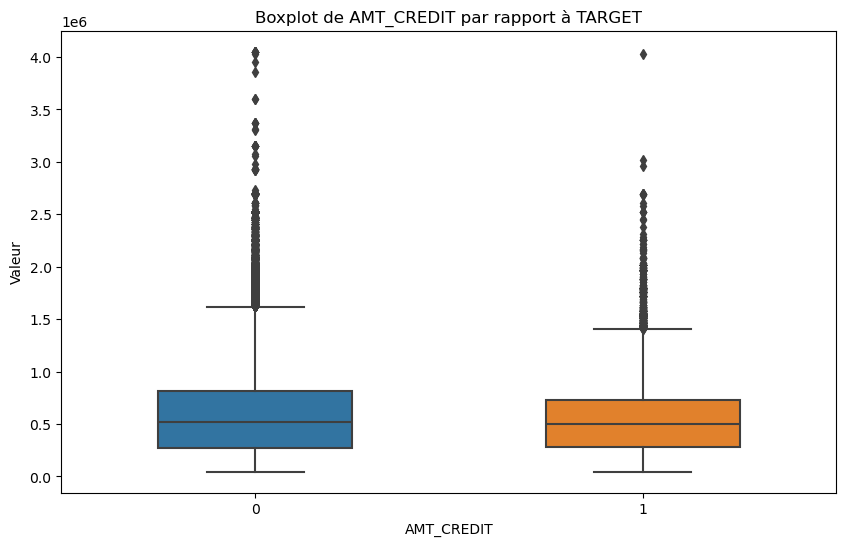

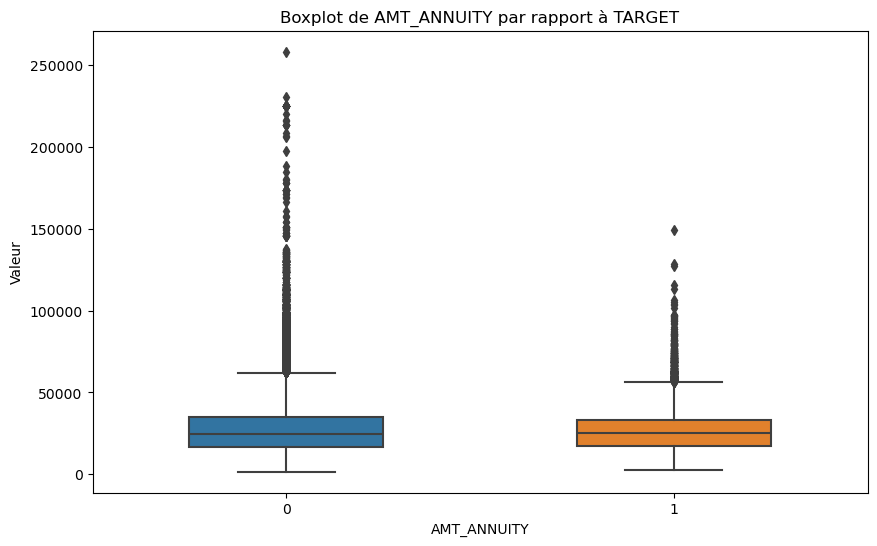

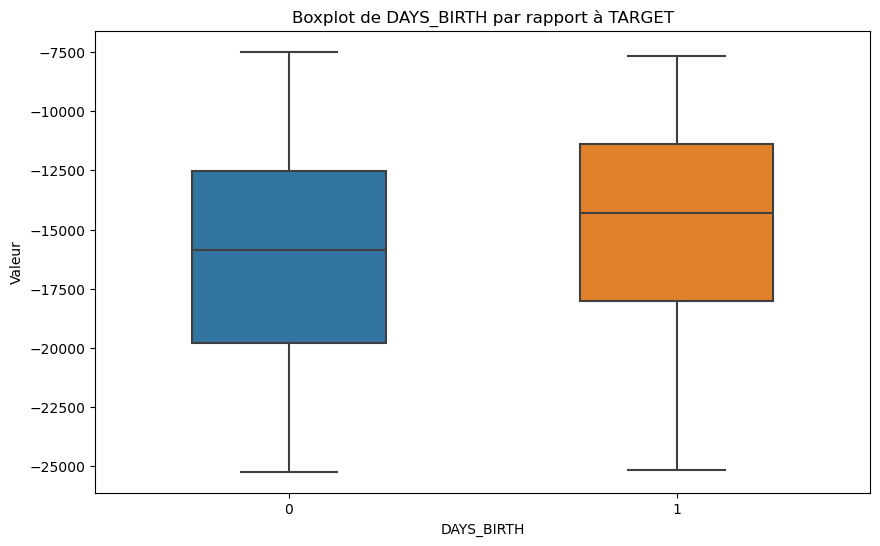

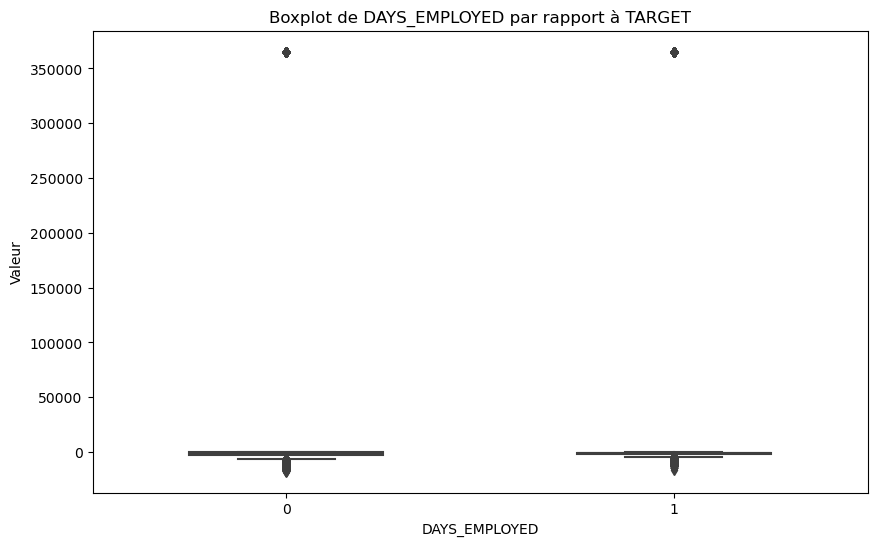

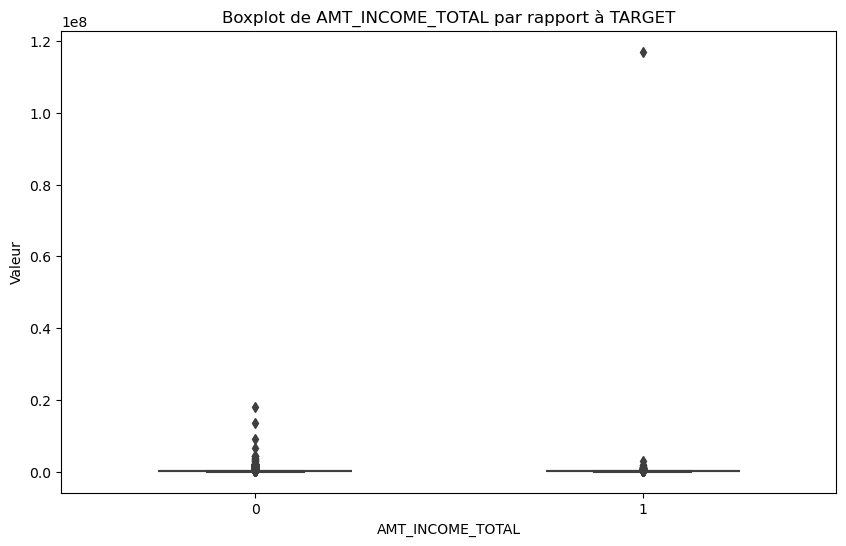

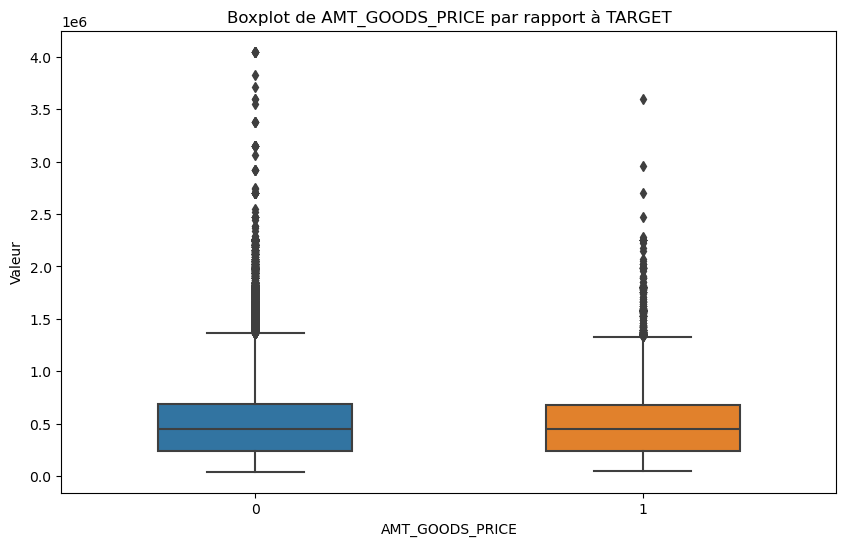

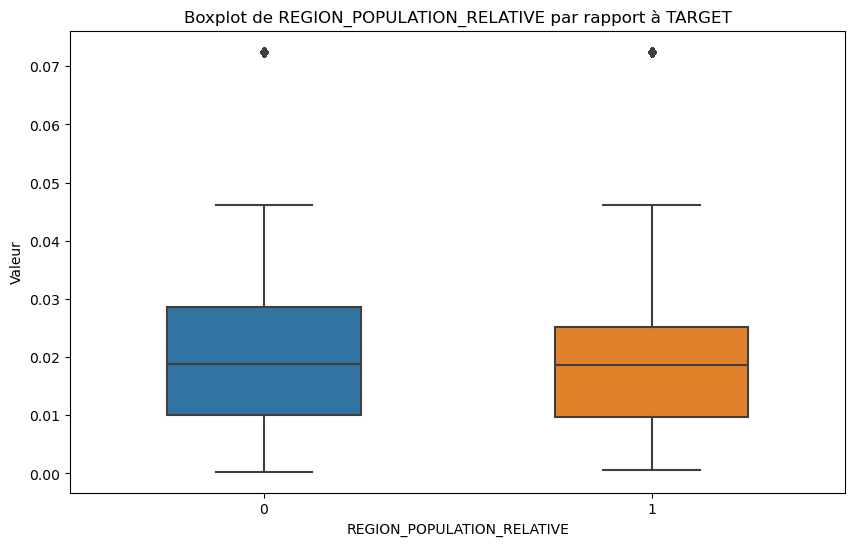

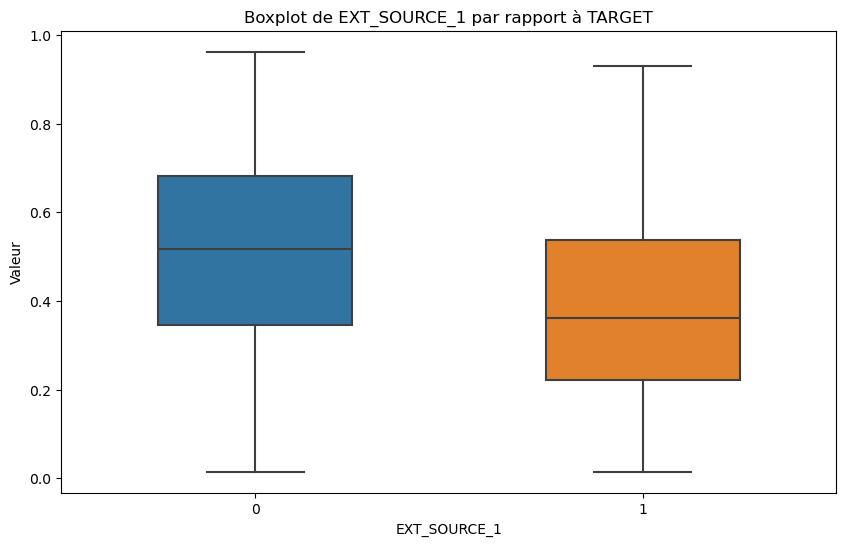

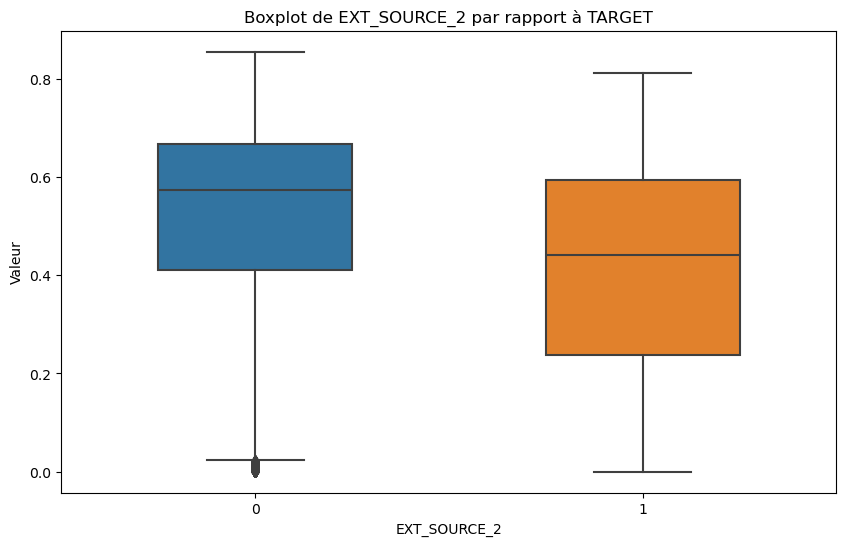

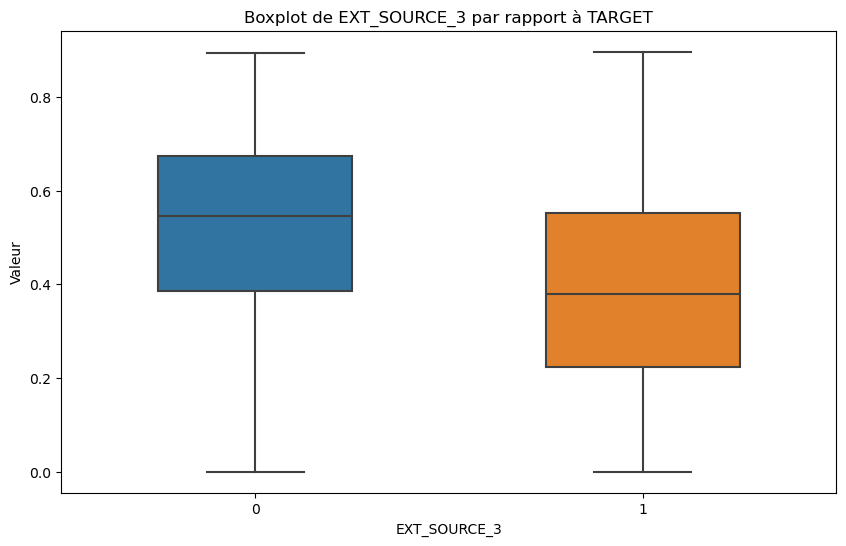

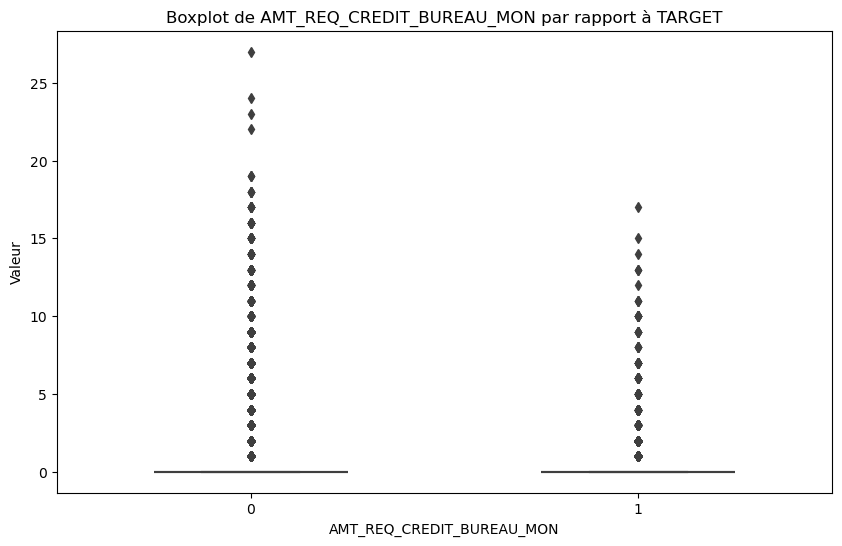

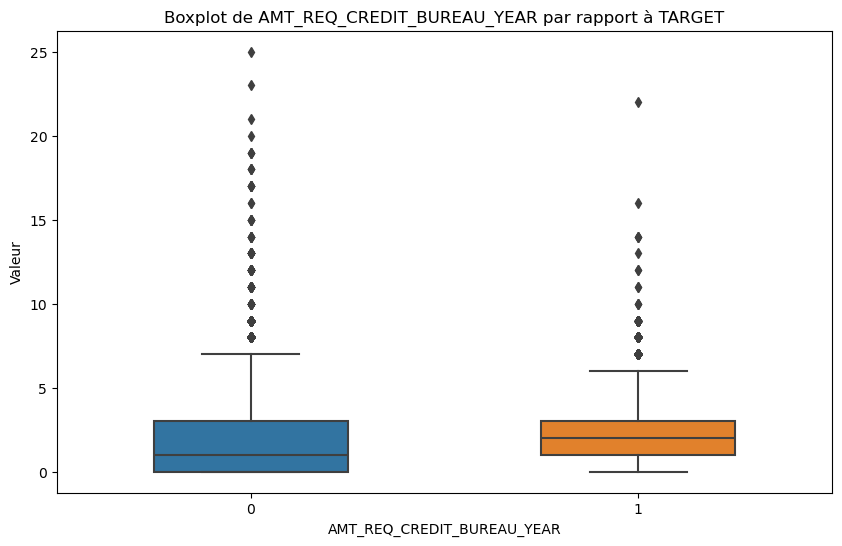

In [23]:

for col in ['AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train, x='TARGET', y=col, width=0.5)
    plt.title(f'Boxplot de {col} par rapport à TARGET')
    plt.xlabel(col)
    plt.ylabel('Valeur')
    plt.show()

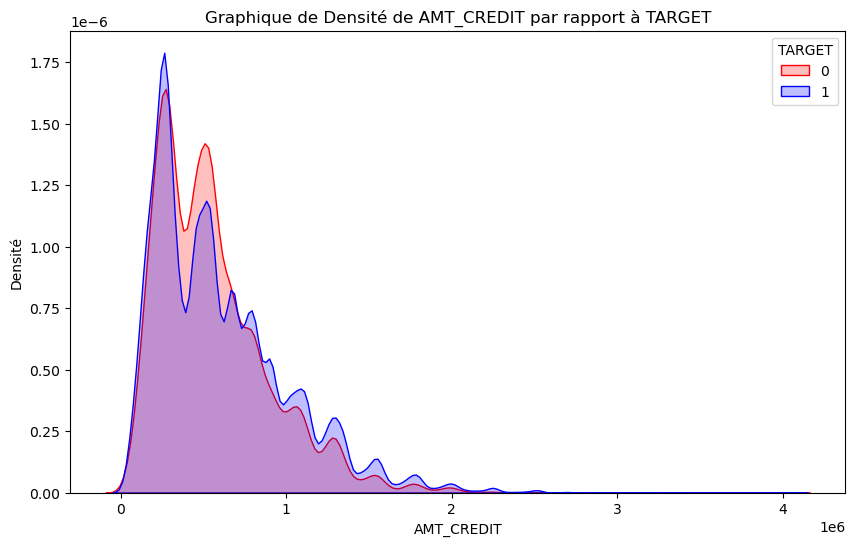

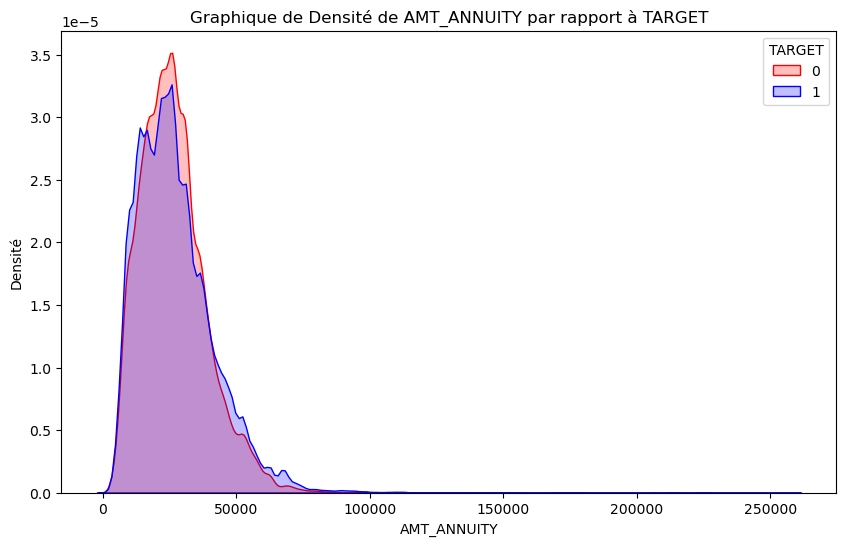

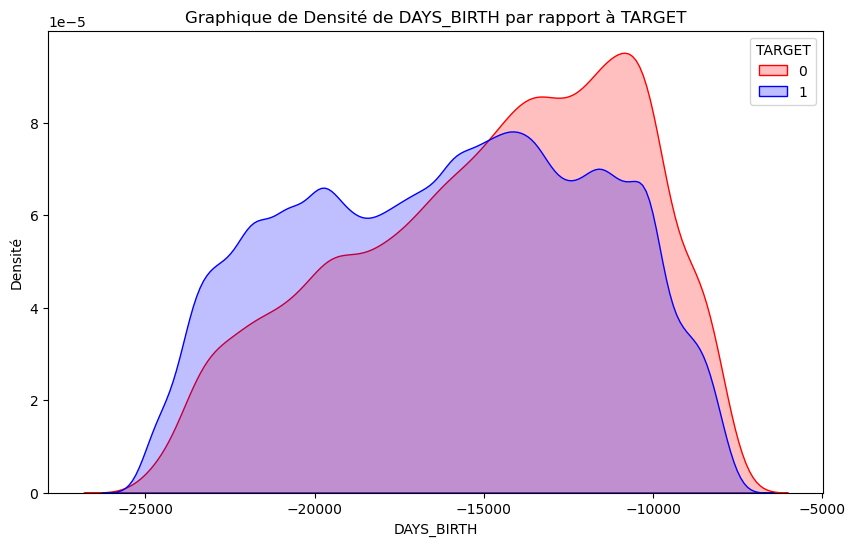

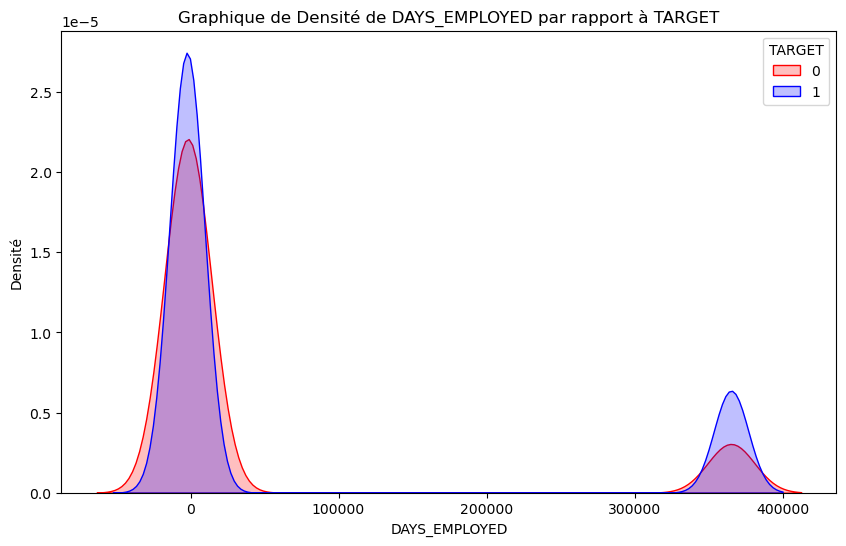

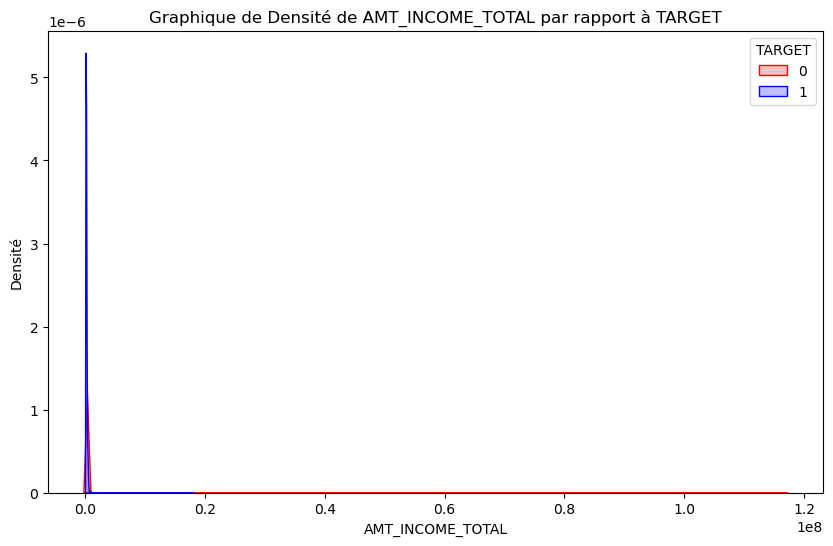

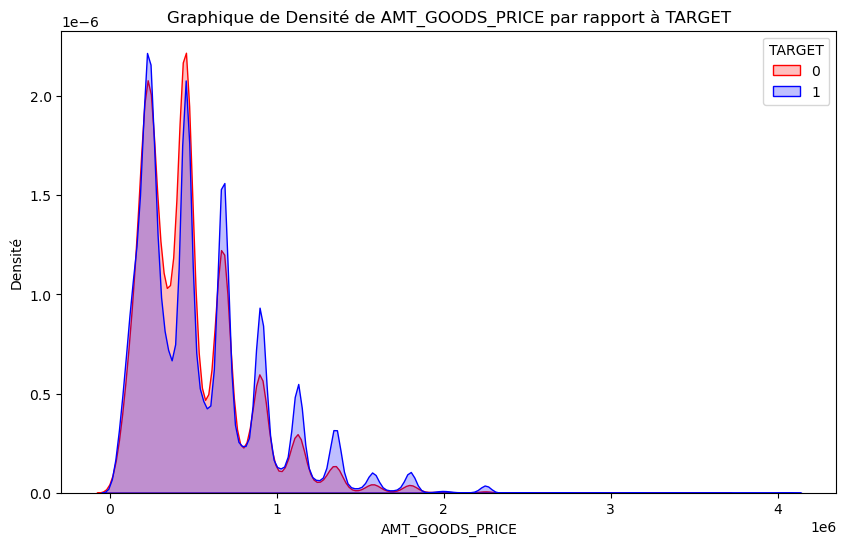

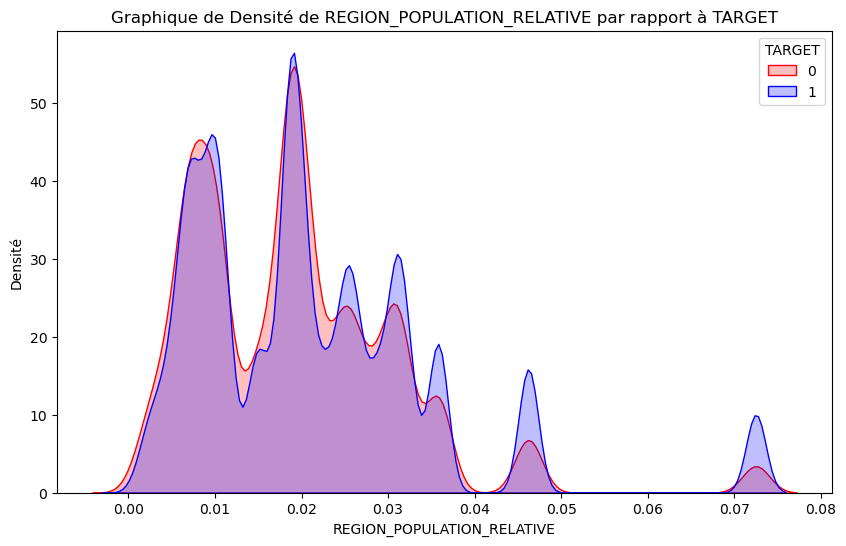

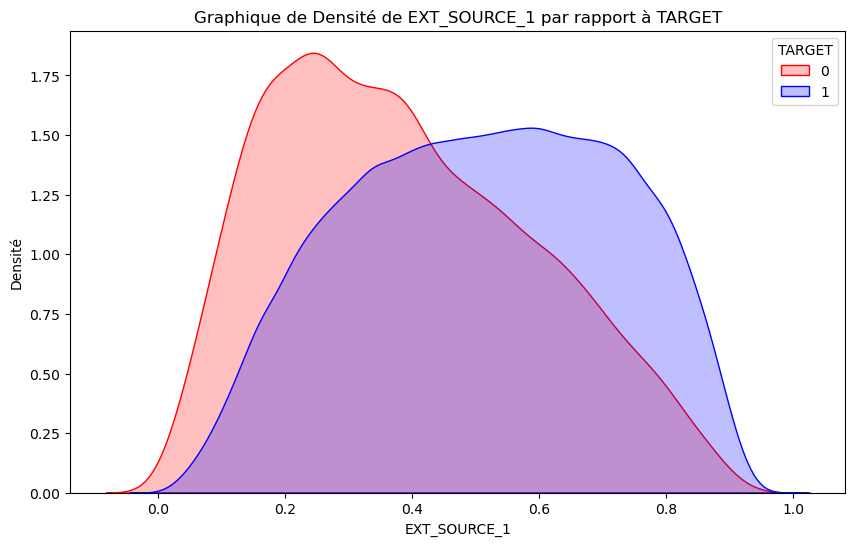

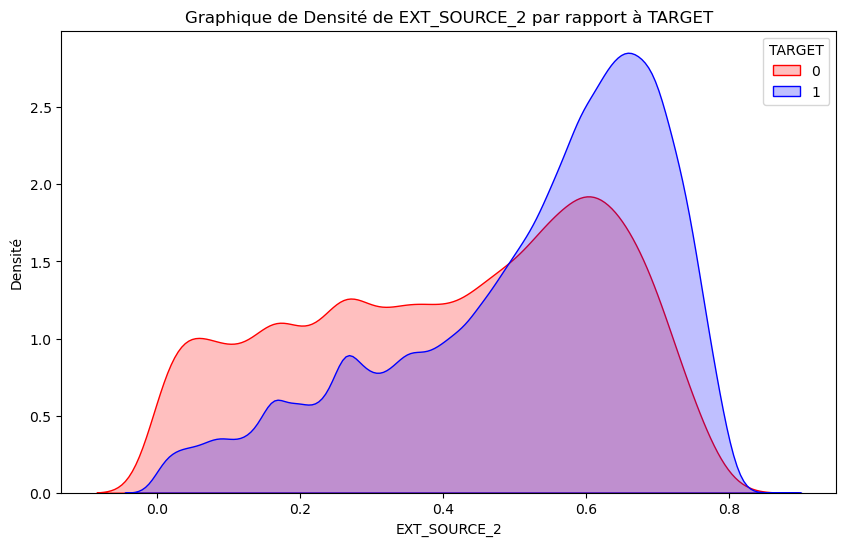

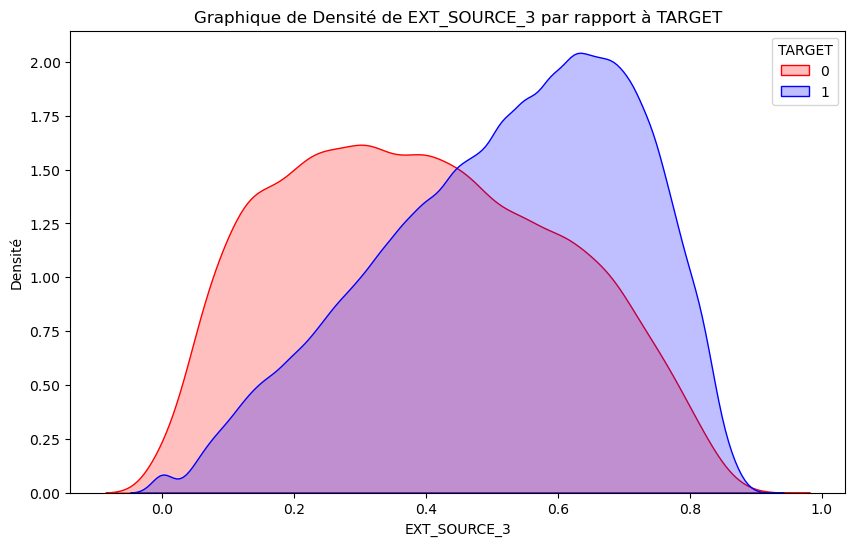

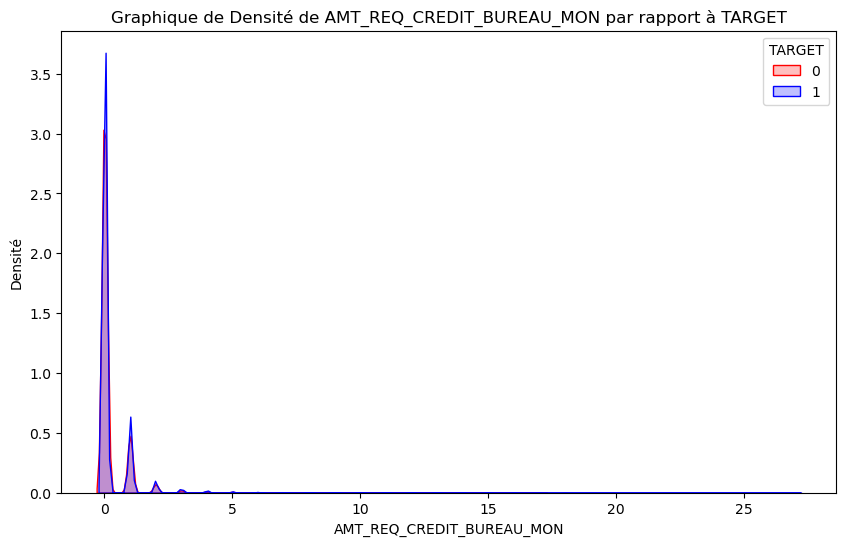

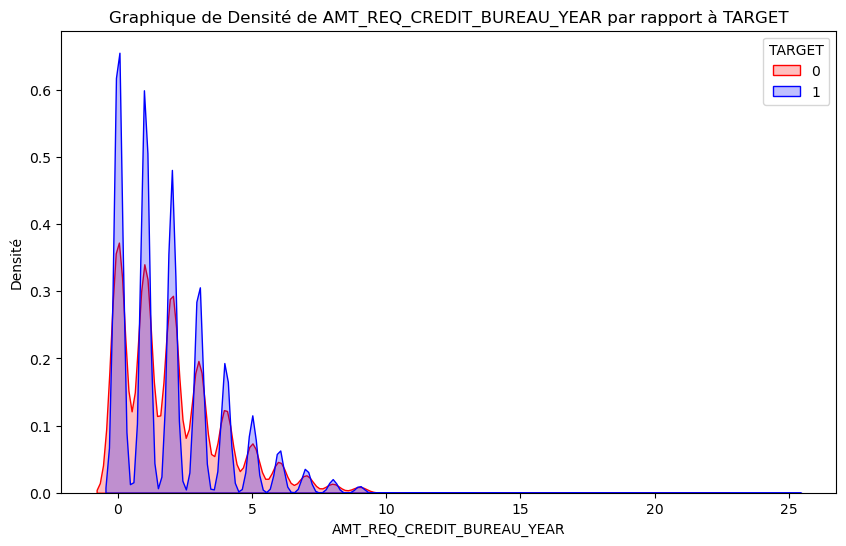

In [24]:


cols_to_plot = [
    'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=train, x=col, hue='TARGET', common_norm=False, fill=True, palette=['blue', 'red'])
    plt.title(f'Graphique de Densité de {col} par rapport à TARGET')
    plt.xlabel(col)
    plt.ylabel('Densité')
    
    # Ajoutez une légende personnalisée
    legend_labels = {'blue': 0, 'red': 1}
    plt.legend(title='TARGET', labels=[legend_labels['blue'], legend_labels['red']], loc='upper right')
    
    plt.show()


       DAYS_EMPLOYED
count  307511.000000
mean    63815.045904
std    141275.766519
min    -17912.000000
25%     -2760.000000
50%     -1213.000000
75%      -289.000000
max    365243.000000


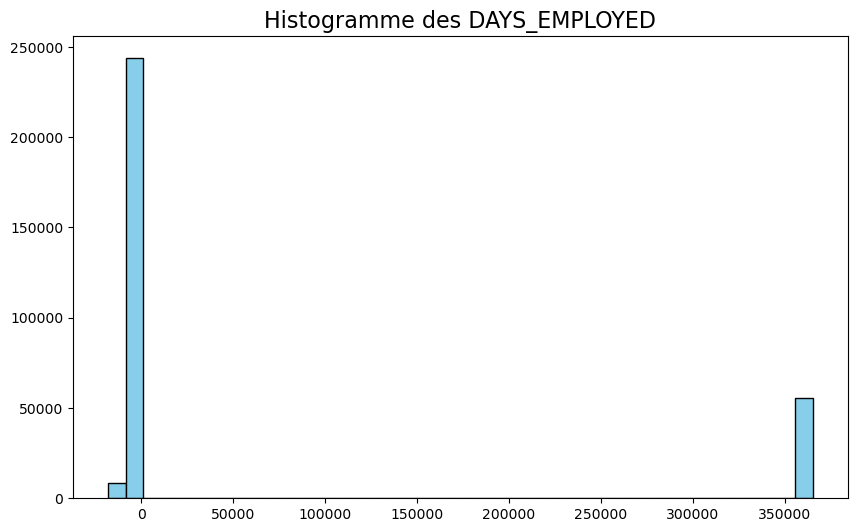

In [25]:
print(train[['DAYS_EMPLOYED']].describe())

fig, ax = plt.subplots(figsize=(10, 6))
train[['DAYS_EMPLOYED']].hist(ax=ax, color='skyblue', edgecolor='black', grid=False,bins=40)

plt.title('Histogramme des DAYS_EMPLOYED', fontsize=16)

plt.show() # DAYS_EMPLOYED

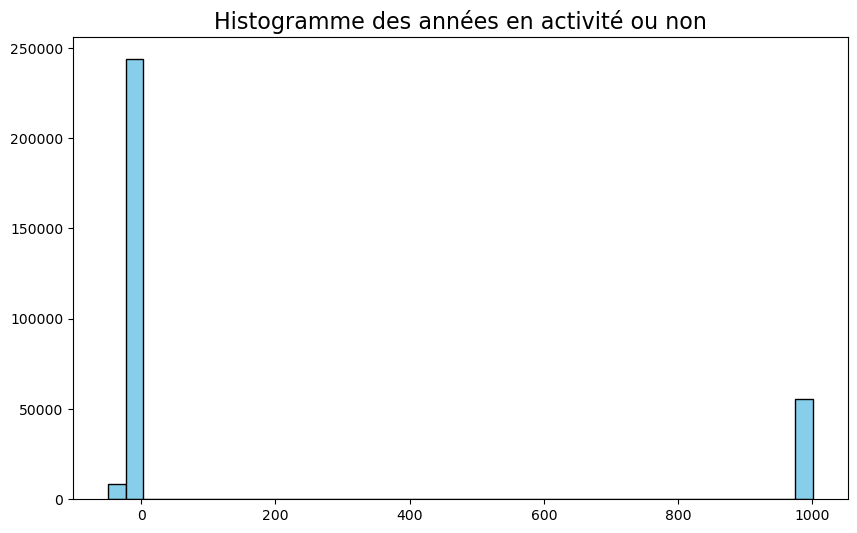

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

(train['DAYS_EMPLOYED']/365 ).hist(ax=ax, color='skyblue', edgecolor='black', grid=False,bins=40)
plt.title('Histogramme des années en activité ou non', fontsize=16)

plt.show()

In [27]:
(train['DAYS_EMPLOYED']/365 ).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

### Corrélation

In [28]:
num=numeric_columns.drop(['SK_ID_CURR','CNT_CHILDREN','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'],axis=1)
mc_num=num.corr()

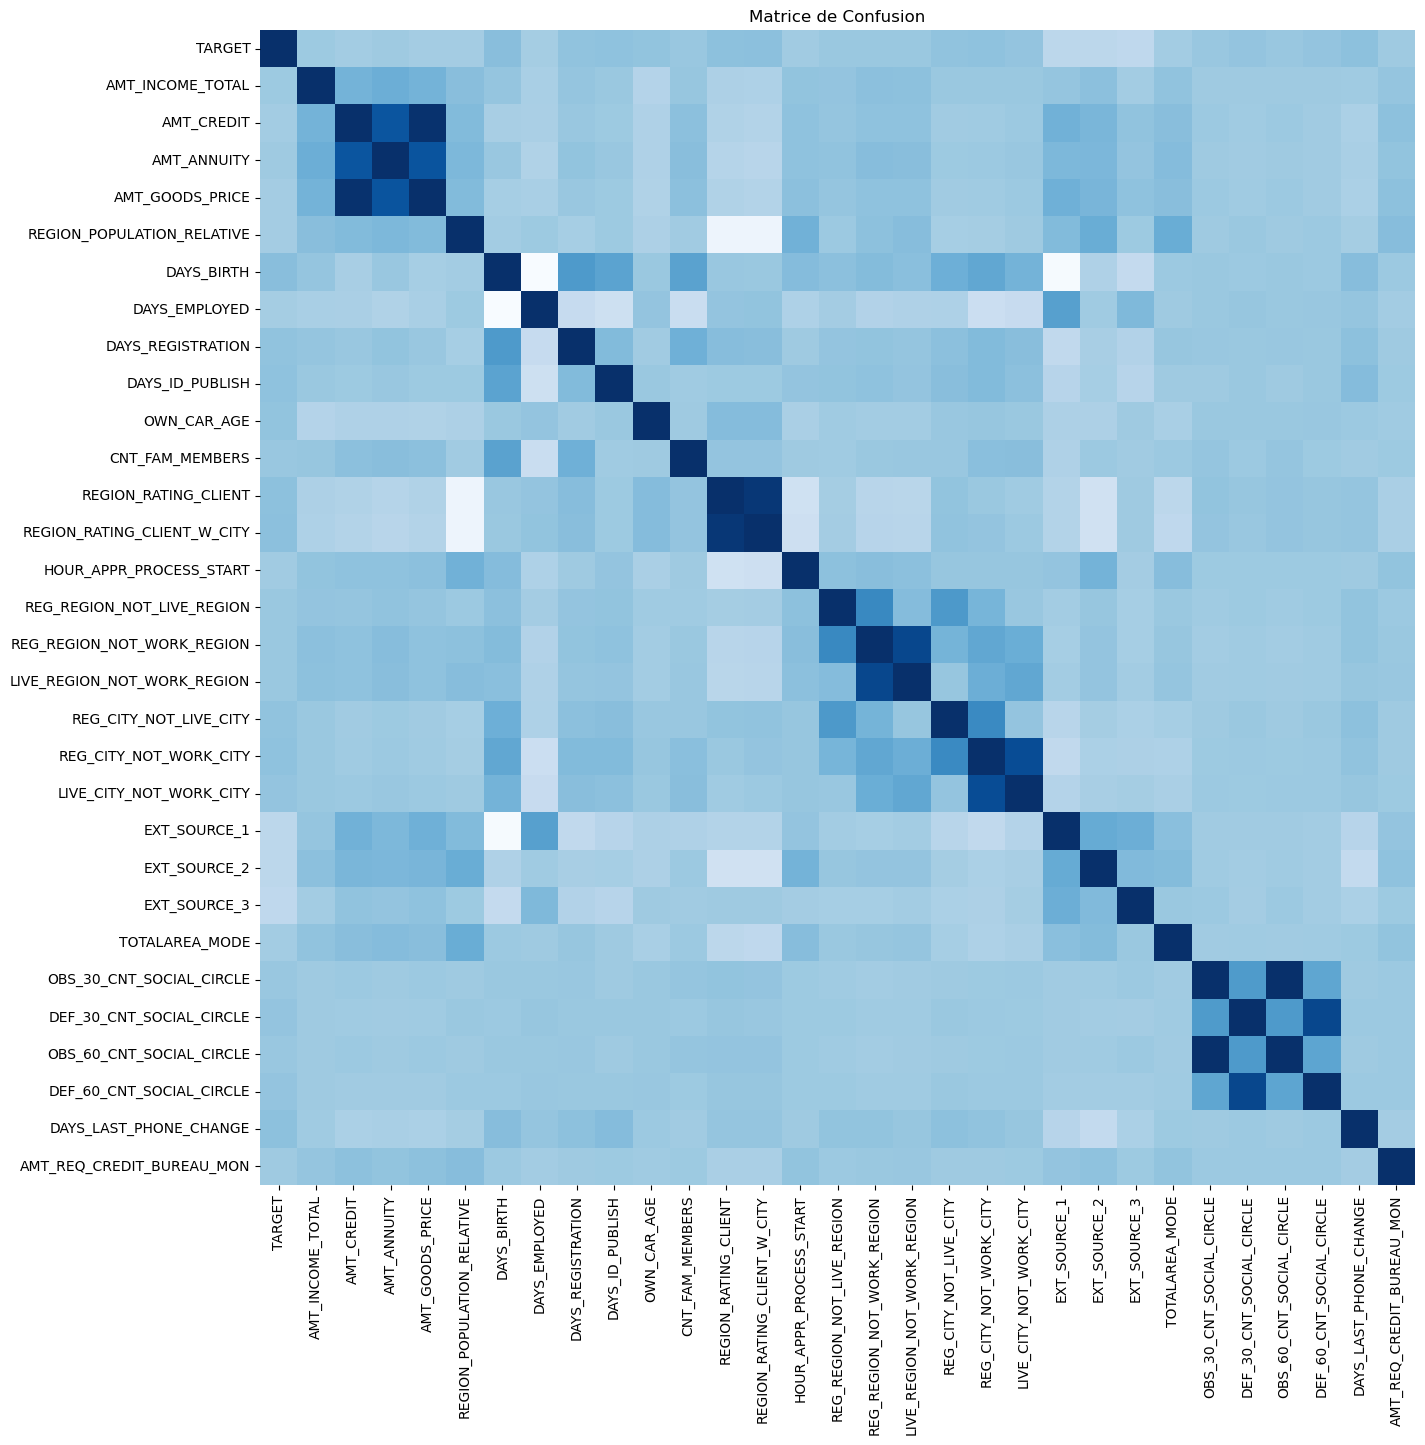

In [29]:
plt.figure(figsize=(15, 15))
sns.heatmap(mc_num, annot=False, cmap='Blues', cbar=False, square=True)
plt.title('Matrice de Confusion')
plt.show()

In [30]:
# Tri des colonnes en fonction de la corrélation absolue avec la variable cible
correlation_with_target = mc_num['TARGET'].abs().sort_values(ascending=False)
correlation_with_target.to_frame('correlation_with_target')

,correlation_with_target
TARGET,1.000000
EXT_SOURCE_3,0.178919
EXT_SOURCE_2,0.160472
EXT_SOURCE_1,0.155317
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994


In [31]:
mc_num.style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON
TARGET,1.0,-0.003982,-0.03037,-0.01282,-0.03965,-0.03723,0.07824,-0.04493,0.04197,0.05146,0.03761,0.009308,0.0589,0.06089,-0.02417,0.005576,0.006942,0.002819,0.0444,0.05099,0.03252,-0.1553,-0.1605,-0.1789,-0.0326,0.009131,0.03225,0.009022,0.03128,0.05522,-0.01246
AMT_INCOME_TOTAL,-0.003982,1.0,0.1569,0.1917,0.1596,0.0748,0.02726,-0.06422,0.02781,0.008506,-0.1173,0.01634,-0.08547,-0.09173,0.03646,0.03119,0.06234,0.05806,0.003574,0.006431,0.008285,0.02623,0.06092,-0.03023,0.04198,-0.0131,-0.01324,-0.01302,-0.01313,-0.01859,0.0247
AMT_CREDIT,-0.03037,0.1569,1.0,0.7701,0.987,0.09974,-0.05544,-0.06684,0.009621,-0.006575,-0.09419,0.06316,-0.1018,-0.1109,0.05274,0.02401,0.05193,0.05261,-0.02689,-0.01886,8.082e-05,0.1684,0.1312,0.04352,0.07282,0.0001896,-0.02123,0.0002386,-0.02377,-0.0737,0.05445
AMT_ANNUITY,-0.01282,0.1917,0.7701,1.0,0.7751,0.1184,0.009445,-0.1043,0.03851,0.01127,-0.09706,0.07554,-0.1285,-0.1417,0.05227,0.0413,0.07942,0.07455,-0.006214,0.0008963,0.01008,0.1194,0.1258,0.03075,0.09041,-0.01199,-0.02283,-0.01173,-0.024,-0.06375,0.03915
AMT_GOODS_PRICE,-0.03965,0.1596,0.987,0.7751,1.0,0.1035,-0.05344,-0.06484,0.01156,-0.009267,-0.1037,0.06119,-0.1038,-0.1122,0.06232,0.02611,0.05317,0.05286,-0.02721,-0.02033,-0.001309,0.1755,0.1394,0.04772,0.07753,0.0003281,-0.02224,0.0003472,-0.02451,-0.07631,0.05642
REGION_POPULATION_RELATIVE,-0.03723,0.0748,0.09974,0.1184,0.1035,1.0,-0.02958,-0.00398,-0.05382,-0.003993,-0.08143,-0.02421,-0.5329,-0.5315,0.1713,0.002118,0.05694,0.08102,-0.0505,-0.04406,-0.01519,0.1,0.1989,-0.006001,0.2021,-0.01116,0.006329,-0.01064,0.002404,-0.04401,0.07861
DAYS_BIRTH,0.07824,0.02726,-0.05544,0.009445,-0.05344,-0.02958,1.0,-0.6159,0.3319,0.2727,0.005761,0.2789,0.009361,0.008073,0.09106,0.06549,0.09582,0.06957,0.1804,0.2424,0.1589,-0.6006,-0.092,-0.2055,0.001329,0.007425,0.0002055,0.007023,0.001925,0.08294,0.001372
DAYS_EMPLOYED,-0.04493,-0.06422,-0.06684,-0.1043,-0.06484,-0.00398,-0.6159,1.0,-0.2102,-0.2724,0.02883,-0.2335,0.03275,0.03462,-0.09114,-0.0358,-0.1072,-0.09554,-0.09052,-0.2546,-0.2181,0.2898,-0.02077,0.1134,-0.01513,0.005734,0.01672,0.005888,0.01421,0.02303,-0.03446
DAYS_REGISTRATION,0.04197,0.02781,0.009621,0.03851,0.01156,-0.05382,0.3319,-0.2102,1.0,0.1019,-0.02599,0.1734,0.08021,0.07404,-0.01091,0.02821,0.03679,0.02756,0.06433,0.09987,0.07266,-0.1811,-0.05991,-0.1075,0.0195,0.009125,0.003361,0.009088,0.004538,0.05698,-0.01135
DAYS_ID_PUBLISH,0.05146,0.008506,-0.006575,0.01127,-0.009267,-0.003993,0.2727,-0.2724,0.1019,1.0,0.008633,-0.02091,-0.005103,-0.007737,0.03168,0.03476,0.04807,0.03394,0.07633,0.09935,0.06109,-0.1324,-0.05096,-0.1316,-0.01115,-0.01245,0.002738,-0.01287,0.004328,0.08858,-0.00966


In [32]:
correlation_matrix = mc_num

# Trouver les paires de colonnes ayant une corrélation significative 
seuil = 0.7  # seuil à ajuster

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > seuil and j!=i:

            colname = correlation_matrix.columns[i]
            rowname=correlation_matrix.columns[j]
            print((colname,rowname))


# Affichage des paires de colonnes les plus corrélées entre elles


('AMT_CREDIT', 'AMT_ANNUITY')
('AMT_CREDIT', 'AMT_GOODS_PRICE')
('AMT_ANNUITY', 'AMT_CREDIT')
('AMT_ANNUITY', 'AMT_GOODS_PRICE')
('AMT_GOODS_PRICE', 'AMT_CREDIT')
('AMT_GOODS_PRICE', 'AMT_ANNUITY')
('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY')
('REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT')
('REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION')
('LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION')
('REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY')
('LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY')
('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE')
('DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE')
('OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE')
('DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE')


In [33]:
num=numeric_columns.drop(['SK_ID_CURR','CNT_CHILDREN','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1)
mc_num=num.corr()

In [34]:
colonnes_entieres = numeric_columns.select_dtypes(include='int')
colonnes_entieres_corr=colonnes_entieres.drop(['SK_ID_CURR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1).corr(method=lambda x, y: matthews_corrcoef(x, y))

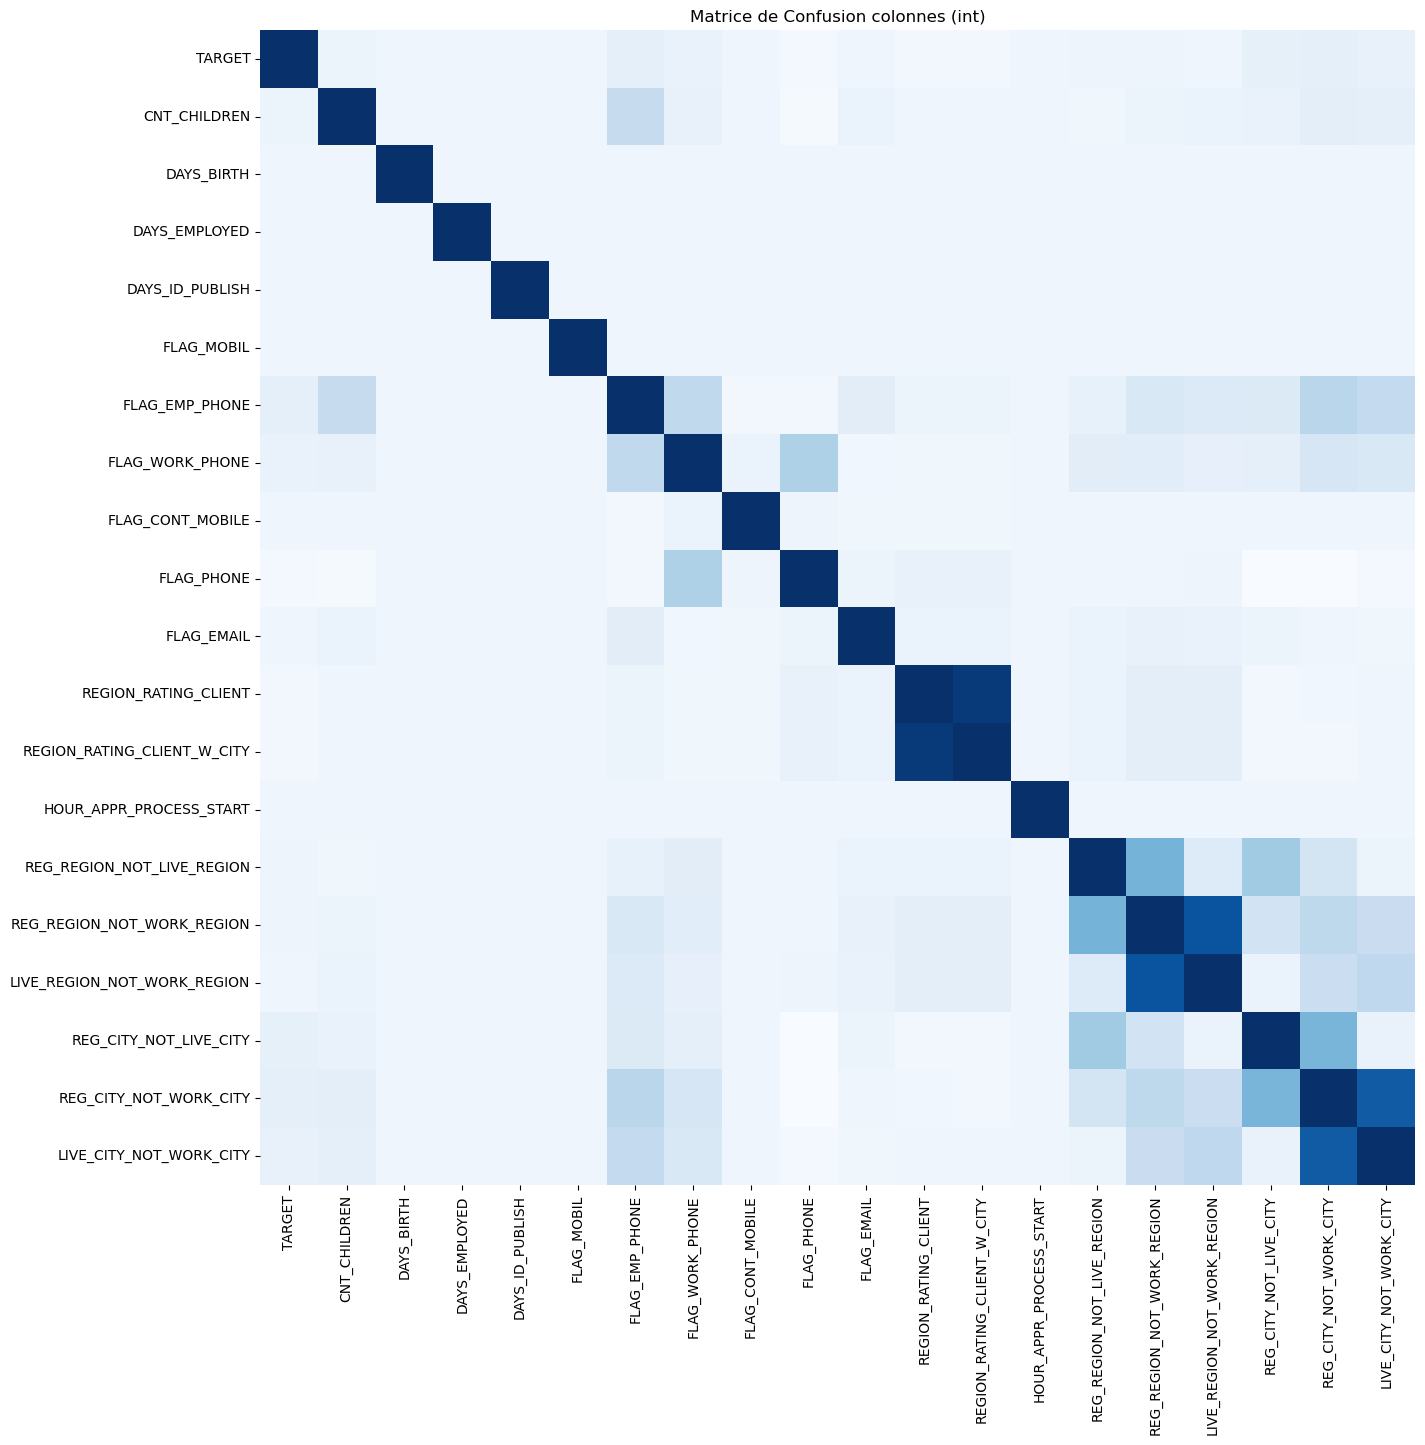

In [35]:
plt.figure(figsize=(15, 15))
sns.heatmap(colonnes_entieres_corr, annot=False, cmap='Blues', cbar=False, square=True)
plt.title('Matrice de Confusion colonnes (int)')
plt.show()

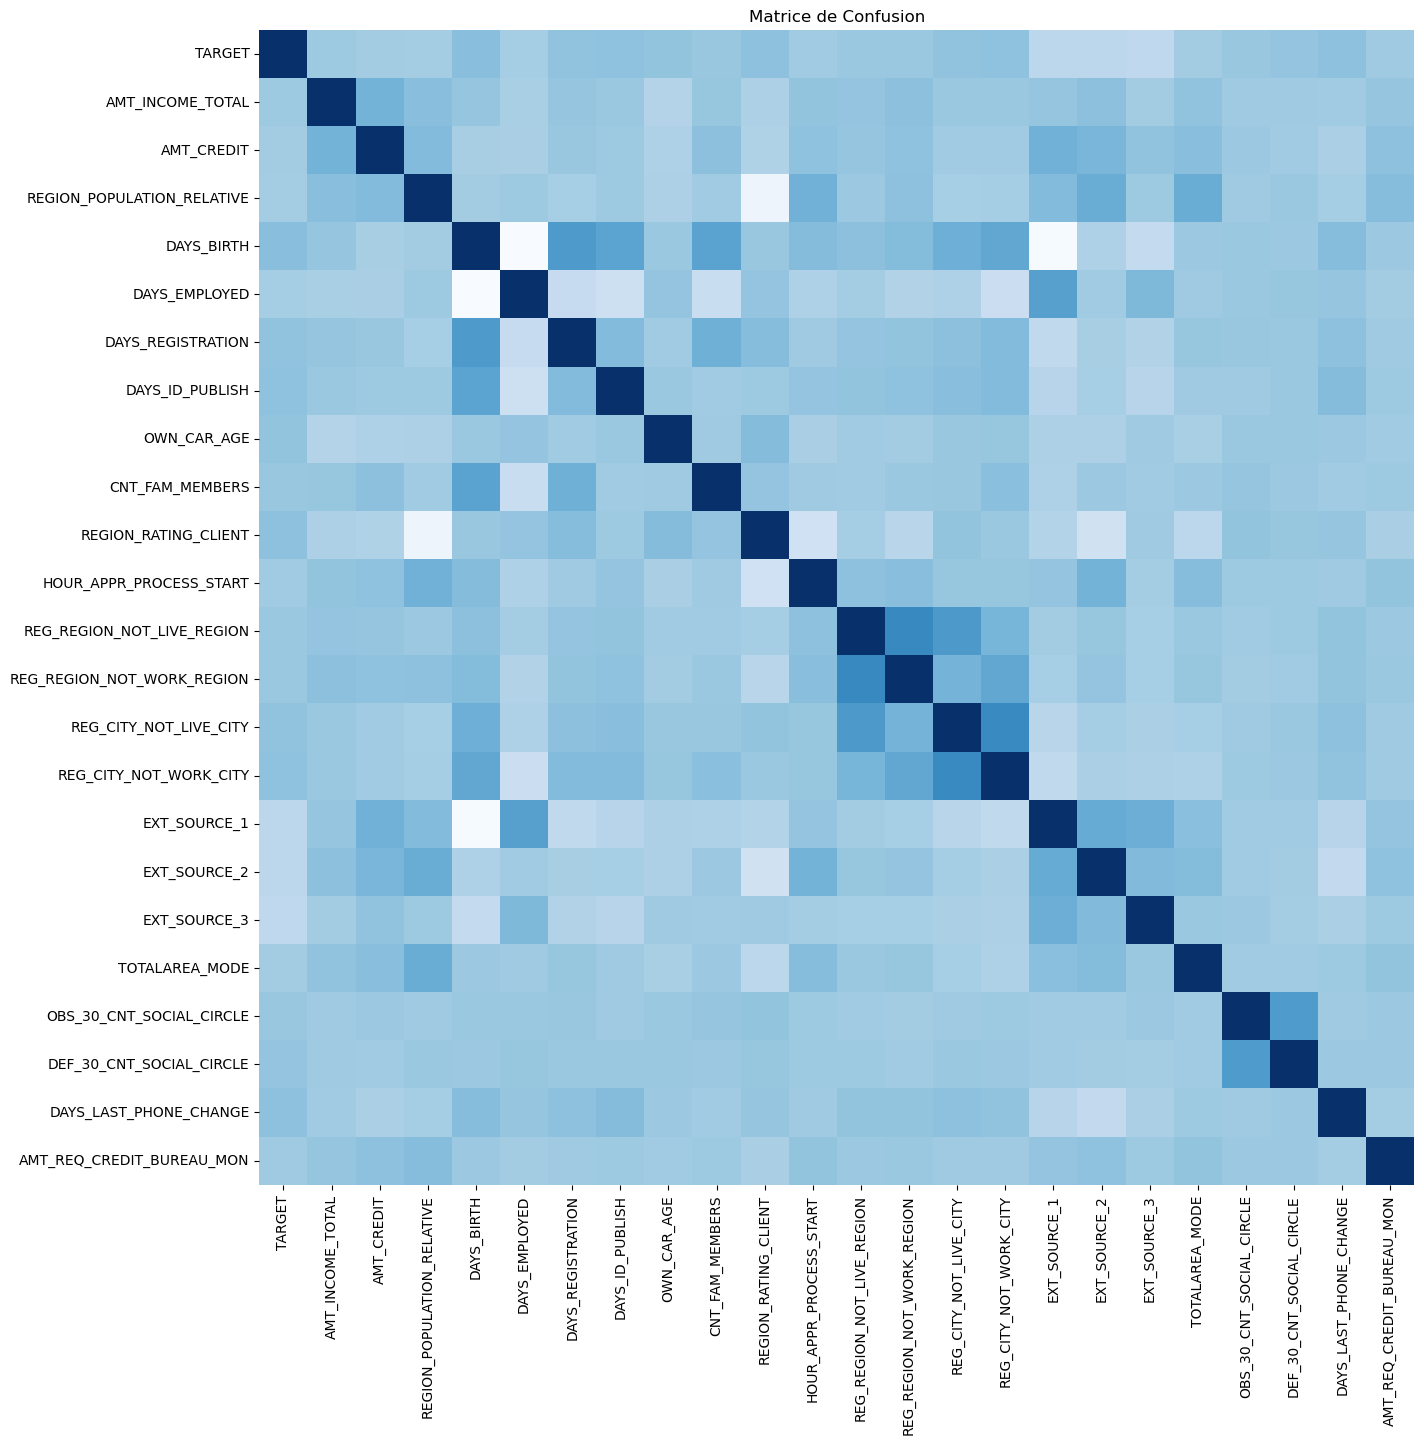

In [36]:
plt.figure(figsize=(15, 15))
sns.heatmap(mc_num, annot=False, cmap='Blues', cbar=False, square=True)
plt.title('Matrice de Confusion')
plt.show()

In [37]:
train.drop(['AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REG_CITY_NOT_WORK_CITY'],inplace=True,axis=1)

In [38]:
EXT_SOURCE_TARGET=['EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']
train[EXT_SOURCE_TARGET].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_1,1.0,0.214,0.1868,-0.1553
EXT_SOURCE_2,0.214,1.0,0.1092,-0.1605
EXT_SOURCE_3,0.1868,0.1092,1.0,-0.1789
TARGET,-0.1553,-0.1605,-0.1789,1.0


In [39]:
AMT_REQ_CREDIT=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','TARGET']
train[AMT_REQ_CREDIT].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

# suppression des varaibles AMT_REQ_CREDIT car elles n'ont aucun impactent et pour avoir une simplicité et interprétabilité plus grandes



,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,TARGET
AMT_REQ_CREDIT_BUREAU_HOUR,1.0,0.2304,0.004706,-1.831e-05,-0.002716,0.0009304
AMT_REQ_CREDIT_BUREAU_DAY,0.2304,1.0,0.2174,-0.005258,-0.004416,0.002704
AMT_REQ_CREDIT_BUREAU_WEEK,0.004706,0.2174,1.0,-0.0141,-0.01511,0.0007877
AMT_REQ_CREDIT_BUREAU_MON,-1.831e-05,-0.005258,-0.0141,1.0,-0.007789,-0.01246
AMT_REQ_CREDIT_BUREAU_QRT,-0.002716,-0.004416,-0.01511,-0.007789,1.0,-0.002022
TARGET,0.0009304,0.002704,0.0007877,-0.01246,-0.002022,1.0


In [40]:
AMT_REQ_CREDIT=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']

train.drop(AMT_REQ_CREDIT,axis=1,inplace=True)

### Colonnes categories

In [41]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).to_frame('nbr_valeurs_uniques')


,nbr_valeurs_uniques
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


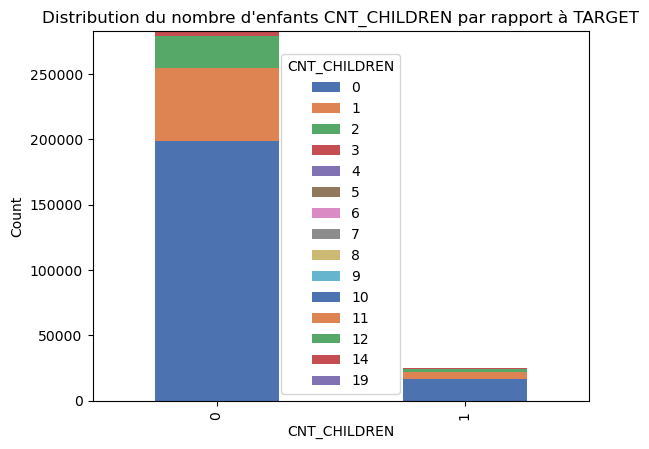

In [42]:
col1 = 'TARGET'
col2 = 'CNT_CHILDREN'

counts = train.groupby([col1, col2]).size().unstack()
colors = sns.color_palette("deep", n_colors=len(train['CNT_CHILDREN'].unique()))

counts.plot(kind='bar', stacked=True, color=colors)
plt.title(f'Distribution du nombre d\'enfants {col2} par rapport à {col1}')
plt.xlabel(col2)
plt.ylabel('Count')
plt.show()

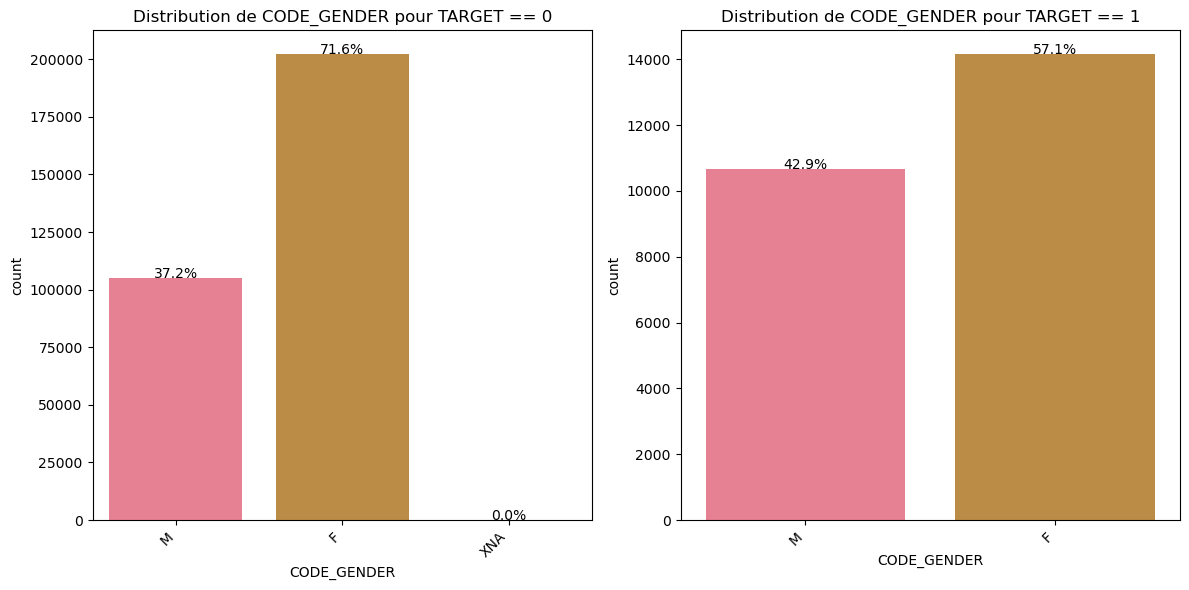

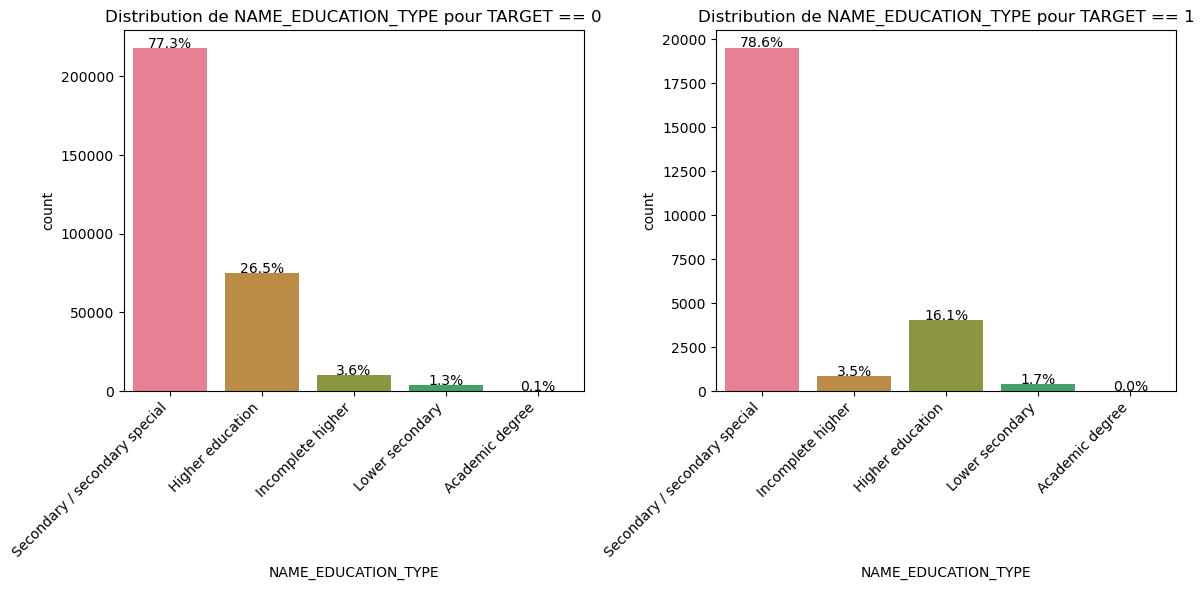

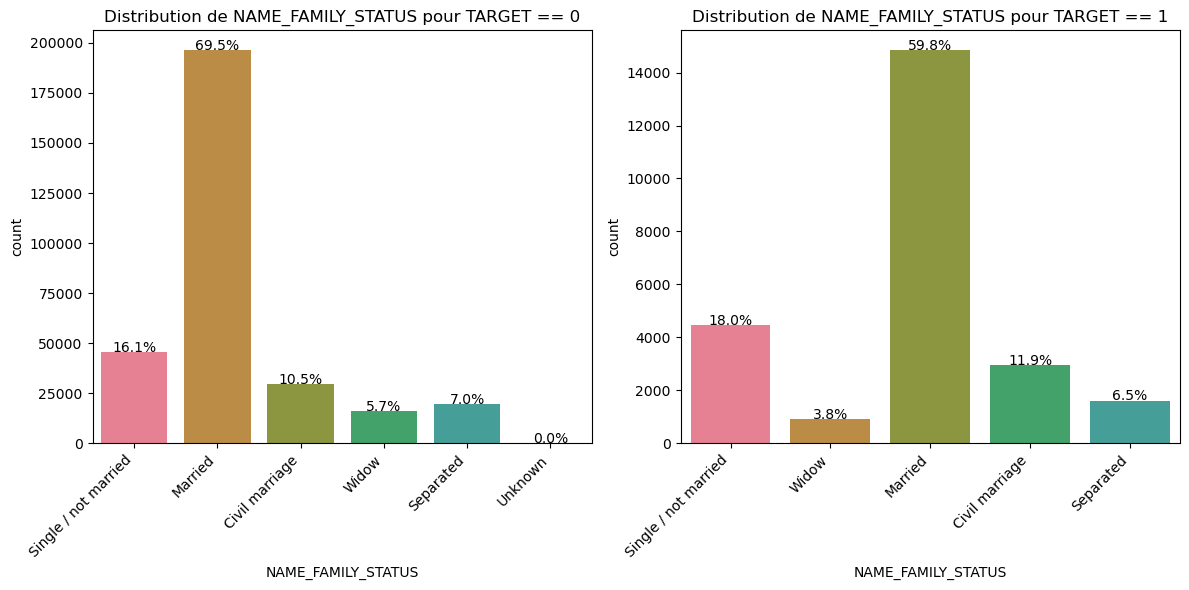

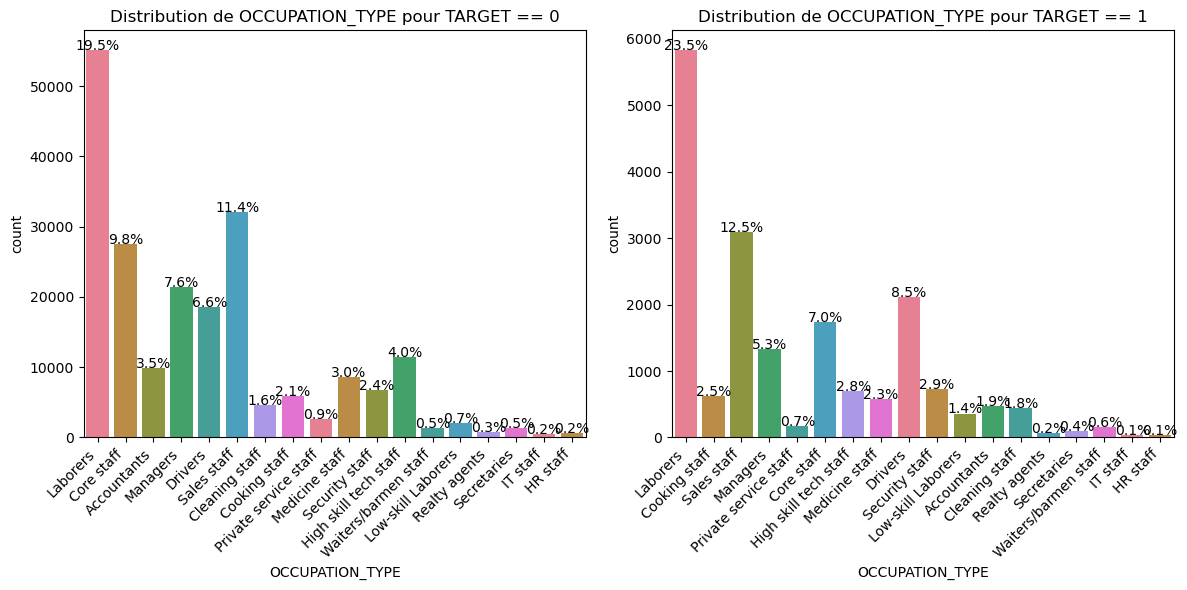

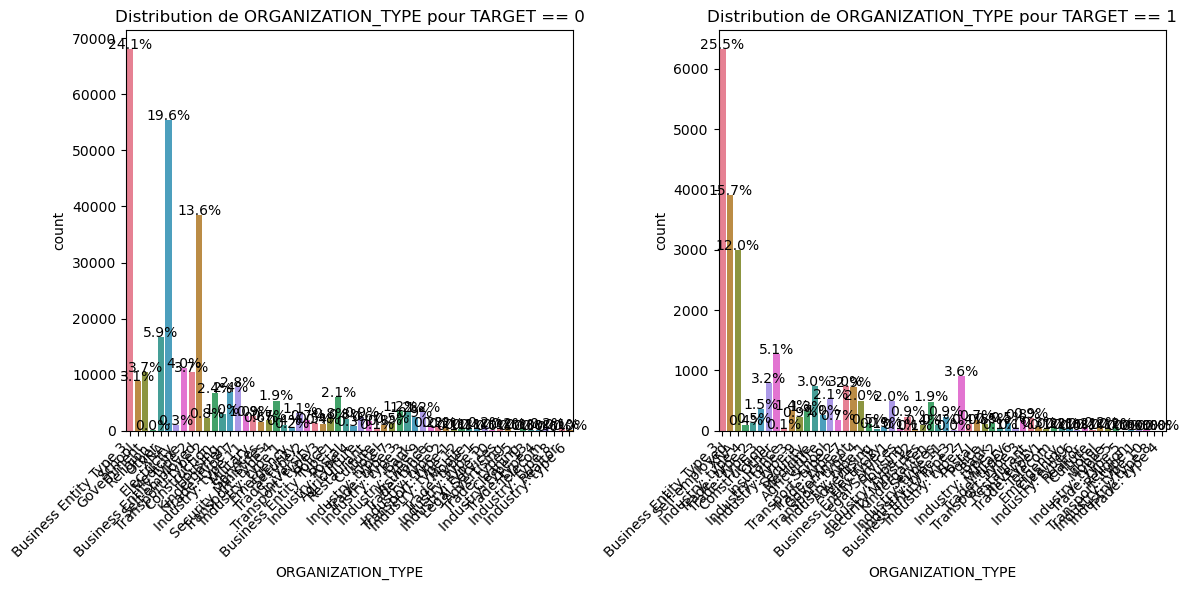

In [43]:

# Définir des couleurs vives personnalisées
colors = sns.color_palette("husl", 8)

cat_col = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

# Définir une palette globale
sns.set_palette("husl")

def cat_stats(df, features):
    for feature in features:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

        # Plot distribution for TARGET == 0 avec la palette spécifiée
        sns.countplot(x=feature, data=df, ax=ax1, palette=colors)
        ax1.set_title(f'Distribution de {feature} pour TARGET == 0')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

        # Add percentage text to the bars
        total_0 = len(df[df['TARGET'] == 0])
        for p in ax1.patches:
            height = p.get_height()
            ax1.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total_0 * 100:.1f}%', ha='center')

        # Plot distribution for TARGET == 1 avec la palette spécifiée
        sns.countplot(x=feature, data=df[df['TARGET'] == 1], ax=ax2, palette=colors)
        ax2.set_title(f'Distribution de {feature} pour TARGET == 1')
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

        # Add percentage text to the bars
        total_1 = len(df[df['TARGET'] == 1])
        for p in ax2.patches:
            height = p.get_height()
            ax2.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total_1 * 100:.1f}%', ha='center')

        plt.tight_layout()
        plt.show()

cat_stats(train, cat_col)


In [44]:
train['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

# Encodage colonnes categorielles, valeurs aberrantes, nan values

In [45]:
(train['DAYS_EMPLOYED'] ).describe().round(2)

count    307511.00
mean      63815.05
std      141275.77
min      -17912.00
25%       -2760.00
50%       -1213.00
75%        -289.00
max      365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [46]:
(test['DAYS_EMPLOYED'] ).describe().round(2)

count     48744.00
mean      67485.37
std      144348.51
min      -17463.00
25%       -2910.00
50%       -1293.00
75%        -296.00
max      365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [47]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print('proportion de non solvabilité %0.2f%% dans non_anom' % (100 * non_anom['TARGET'].mean()))
print('proportion de non solvabilité %0.2f%% dans anom' % (100 * anom['TARGET'].mean()))
print('il y a %d anomalies de days of employment' % len(anom))
# il y a une proportion équivalente de non solvable donc nous pouvons remplacé cette valeur par nan

proportion de non solvabilité 8.66% dans non_anom
proportion de non solvabilité 5.40% dans anom
il y a 55374 anomalies de days of employment


In [48]:
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [49]:
print(train['CODE_GENDER'].unique())
print(test['CODE_GENDER'].unique())
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
test['DAYS_BIRTH'] = abs(test['DAYS_BIRTH'])

['M' 'F' 'XNA']
['F' 'M']


In [50]:
train['CODE_GENDER'].replace({'XNA': 'M'}, inplace = True) 

## Fill nan values, suppression outliers

### Fonctions

In [51]:
# détecter les outliers en utilisant la méthode IQR
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

def fill_nan(df, strategy_numbre='median', strategy_categorical='most_frequent',just_num=False):
    
    # Impute numerical features using median imputation
    numeric_imputer = SimpleImputer(strategy=strategy_numbre)
    numeric_features_train = df.select_dtypes(include='number')
    imputed_numeric_features_train = numeric_imputer.fit_transform(numeric_features_train)
    if just_num:
        return pd.DataFrame(imputed_numeric_features_train, columns=numeric_features_train.columns)

    # Impute categorical features using most frequent imputation
    categorical_imputer = SimpleImputer(strategy=strategy_categorical)
    categorical_features_train = df.select_dtypes(exclude='number')
    imputed_categorical_features_train = categorical_imputer.fit_transform(categorical_features_train)

    # Concatenate the imputed features
    features_train_imputed = pd.concat([pd.DataFrame(imputed_numeric_features_train, columns=numeric_features_train.columns),
                                    pd.DataFrame(imputed_categorical_features_train, columns=categorical_features_train.columns)],
                                   axis=1)
    
    return features_train_imputed



Nous supprimons les colonnes à majorité de nan values (à 70%)

In [52]:
seuil = 0.7

max_missing_values = seuil * len(train)
train_cleaned = train.dropna(thresh=max_missing_values, axis=1)
train_cleaned.select_dtypes(include='float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

Création du validation set

In [53]:
X_train_cleaned, X_valid, y_train_cleaned , y_valid= train_test_split(train_cleaned.drop('TARGET',axis=1),train_cleaned['TARGET'],stratify=train_cleaned['TARGET'],test_size=0.3)

In [54]:
valid=pd.concat([X_valid,y_valid],axis=1)
train_cleaned=pd.concat([X_train_cleaned,y_train_cleaned],axis=1)

Nous supprimons les outliers pour train, test et valid.

In [55]:
colonnes=train_cleaned.select_dtypes(include='float').columns[:-1]
numeric_columns = train_cleaned[colonnes]
outliers_mask = numeric_columns.apply(detect_outliers)

#  détecter les lignes avec au moins un outlier
outliers_rows = outliers_mask.any(axis=1)

# Supprimer les lignes avec des outliers
train_no_outliers = train_cleaned[~outliers_rows]

In [56]:
numeric_columns = valid[colonnes]
outliers_mask = numeric_columns.apply(detect_outliers)
outliers_rows = outliers_mask.any(axis=1)
valid_no_outliers = valid[~outliers_rows]

numeric_columns = test[colonnes]
outliers_mask = numeric_columns.apply(detect_outliers)
outliers_rows = outliers_mask.any(axis=1)
test_no_outliers = test[~outliers_rows]

In [57]:
features_train_imputed=fill_nan(train_no_outliers)
features_test_imputed=fill_nan(test_no_outliers)
features_valid_imputed=fill_nan(valid_no_outliers)

In [58]:
print(features_train_imputed.isna().sum().unique())
print(features_test_imputed.isna().sum().unique())
print(features_valid_imputed.isna().sum().unique())

[0]
[0]
[0]


## Label encoder 

In [59]:
le = LabelEncoder()

# encodeur sur l'ensemble d'entraînement
for col in features_train_imputed:
    if features_train_imputed[col].dtype == 'object':
        print(col)
        le.fit(features_train_imputed[col])
        features_train_imputed[col] = le.transform(features_train_imputed[col])
        features_test_imputed[col] = le.transform(features_test_imputed[col])
        features_valid_imputed[col] = le.transform(features_valid_imputed[col])



NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


------------

# Features Engineering

Création de termes  polynomiaux entre les indicateurs externes (EXT_SOURCE) et la date de naissance 

In [62]:
for i in features_train_imputed.columns: print(i)

SK_ID_CURR
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_YEAR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PRO

In [63]:
poly_features = features_train_imputed[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_features_test = features_test_imputed[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_features_valid = features_valid_imputed[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
poly_features_valid = poly_transformer.transform(poly_features_valid)

poly_transformer.get_feature_names_out(input_features = [ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_2^3',
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH'], dtype=object)

In [64]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out([ 'EXT_SOURCE_2', 
                                                                         'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features_valid = pd.DataFrame(poly_features_valid, 
                             columns = poly_transformer.get_feature_names_out([ 'EXT_SOURCE_2', 
                                                                         'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features_test = pd.DataFrame(poly_features_test, 
                             columns = poly_transformer.get_feature_names_out([ 'EXT_SOURCE_2', 
                                                                         'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['TARGET'] = features_train_imputed['TARGET']
poly_features_valid['TARGET'] = features_valid_imputed['TARGET']

poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3              -0.193631
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH   -0.179426
EXT_SOURCE_2^2 EXT_SOURCE_3            -0.175142
EXT_SOURCE_2 EXT_SOURCE_3^2            -0.172391
EXT_SOURCE_2                           -0.161086
EXT_SOURCE_3                           -0.155570
EXT_SOURCE_2 DAYS_BIRTH                -0.155275
EXT_SOURCE_2^2                         -0.149296
EXT_SOURCE_2^2 DAYS_BIRTH              -0.147710
EXT_SOURCE_3 DAYS_BIRTH                -0.147330
Name: TARGET, dtype: float64
EXT_SOURCE_3^2 DAYS_BIRTH   -0.140248
EXT_SOURCE_2^3              -0.139492
EXT_SOURCE_2 DAYS_BIRTH^2   -0.130419
EXT_SOURCE_3^3              -0.128406
EXT_SOURCE_3 DAYS_BIRTH^2   -0.123487
DAYS_BIRTH                  -0.074524
DAYS_BIRTH^2                -0.073371
DAYS_BIRTH^3                -0.071361
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


In [65]:
features_train_imputed=pd.concat([features_train_imputed,poly_features[['EXT_SOURCE_2 EXT_SOURCE_3','EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH']]],axis=1)
features_test_imputed=pd.concat([features_test_imputed,poly_features_test[['EXT_SOURCE_2 EXT_SOURCE_3','EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH']]],axis=1)
features_valid_imputed=pd.concat([features_valid_imputed,poly_features_valid[['EXT_SOURCE_2 EXT_SOURCE_3','EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH']]],axis=1)

Création varaibles age, cout du crédit dans le mois, ratio du crédit par rapport au revenu

In [66]:
# Age 
features_train_imputed['AGE']=features_train_imputed['DAYS_BIRTH']/(365)
features_test_imputed['AGE']=features_test_imputed['DAYS_BIRTH']/(365)
features_valid_imputed['AGE']=features_valid_imputed['DAYS_BIRTH']/(365)

features_train_imputed['YEARS_EMPLOYED']=features_train_imputed['DAYS_EMPLOYED']/(-365)
features_test_imputed['YEARS_EMPLOYED']=features_test_imputed['DAYS_EMPLOYED']/(-365)
features_valid_imputed['YEARS_EMPLOYED']=features_valid_imputed['DAYS_EMPLOYED']/(-365)

# Generation de DEBT_TO_INCOME_RATIO 

features_train_imputed['DEBT_TO_INCOME_RATIO'] = features_train_imputed['AMT_CREDIT'] / features_train_imputed['AMT_INCOME_TOTAL']
features_test_imputed['DEBT_TO_INCOME_RATIO'] = features_test_imputed['AMT_CREDIT'] / features_test_imputed['AMT_INCOME_TOTAL']
features_valid_imputed['DEBT_TO_INCOME_RATIO'] = features_valid_imputed['AMT_CREDIT'] / features_valid_imputed['AMT_INCOME_TOTAL']

# Generation de INCOME_TO_CREDIT 

features_train_imputed['INCOME_TO_CREDIT'] = features_train_imputed['AMT_INCOME_TOTAL'] / features_train_imputed['AMT_CREDIT']
features_test_imputed['INCOME_TO_CREDIT'] = features_test_imputed['AMT_INCOME_TOTAL'] / features_test_imputed['AMT_CREDIT']
features_valid_imputed['INCOME_TO_CREDIT'] = features_valid_imputed['AMT_INCOME_TOTAL'] / features_valid_imputed['AMT_CREDIT']

## Ajout de varaibles venant d'autres datasets

### Fonctions

In [67]:

def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = dfs[2]
    bb = dfs[3]
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()

        # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features

    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations

    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()

    # Bureau: Closed credits - using only numerical aggregations
    
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

In [68]:
bureau=bureau_and_balance()
bureau=bureau.reset_index()

### Fill nan values, merge, FLAG_DOCUMENT

In [69]:
missings=bureau.loc[:,bureau.isna().mean() >= 0.6]
bureau = fill_nan(missings,just_num=True)

In [70]:
train=features_train_imputed.join(bureau, how='inner', on='SK_ID_CURR')
valid=features_valid_imputed.join(bureau, how='inner', on='SK_ID_CURR')
test=features_test_imputed.join(bureau, how='inner', on='SK_ID_CURR')


In [71]:
# Aggregating the 20 flag document features into a single feature by summing the number of flag documents per applicant can be a useful approach. By creating a new aggregated feature, we can capture the overall count or presence of flag documents for each applicant and reduce sparsity of the data, which may provide valuable information for the analysis or modeling task.

FLAG_DOCUMENT=['FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']
train['FLAG_DOCUMENT']=train[FLAG_DOCUMENT].sum(axis=1)
test['FLAG_DOCUMENT']=test[FLAG_DOCUMENT].sum(axis=1)
valid['FLAG_DOCUMENT']=valid[FLAG_DOCUMENT].sum(axis=1)

train.drop(FLAG_DOCUMENT,axis=1,inplace=True)
test.drop(FLAG_DOCUMENT,axis=1,inplace=True)
valid.drop(FLAG_DOCUMENT,axis=1,inplace=True)

In [74]:
test_common = test[train.drop('TARGET',axis=1).columns].copy()

In [75]:
#test.drop(['SK_ID_CURR'],axis=1,inplace=True)
train.drop(['SK_ID_CURR'],axis=1,inplace=True)
valid.drop(['SK_ID_CURR'],axis=1,inplace=True)

In [76]:
test_common.reset_index().drop(['index'],axis=1).to_csv('test.csv',index=False)
train.reset_index().drop(['index'],axis=1).to_csv('train.csv',index=False)
valid.reset_index().drop(['index'],axis=1).to_csv('valid.csv',index=False)
features_test_imputed.to_csv('brut_test.csv',index=False)

# EDA

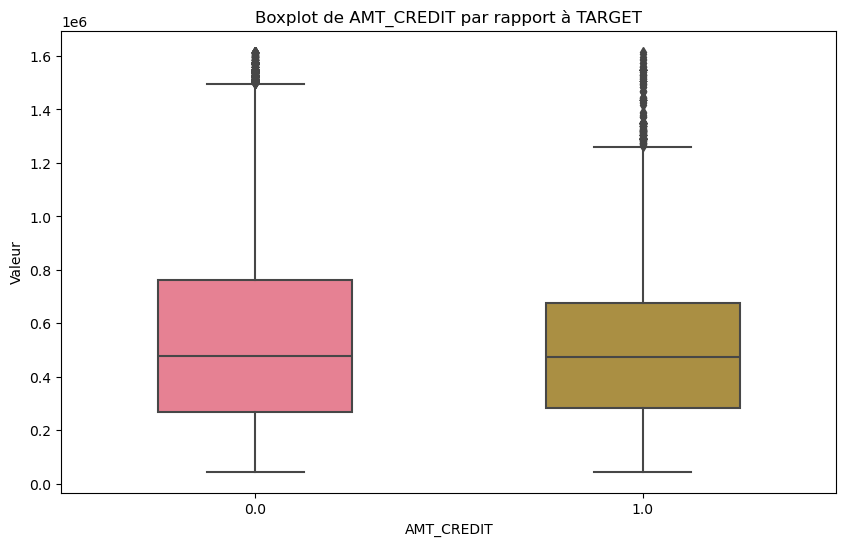

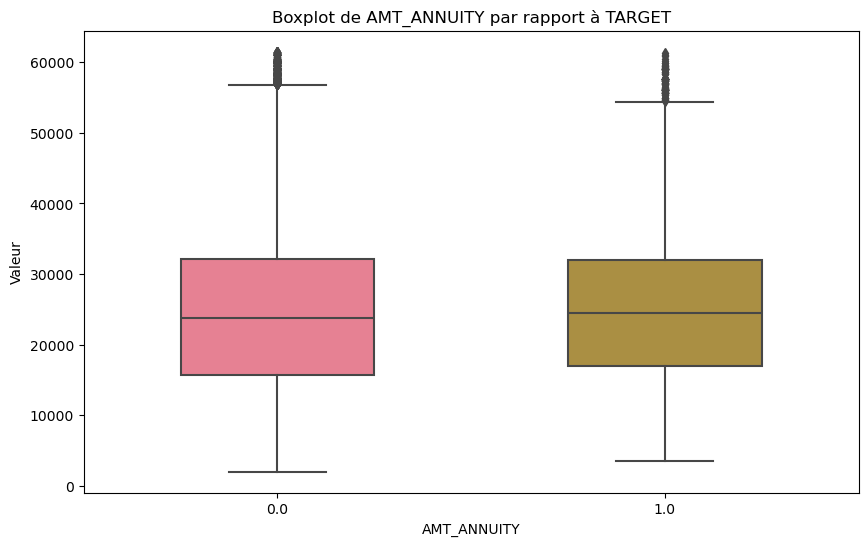

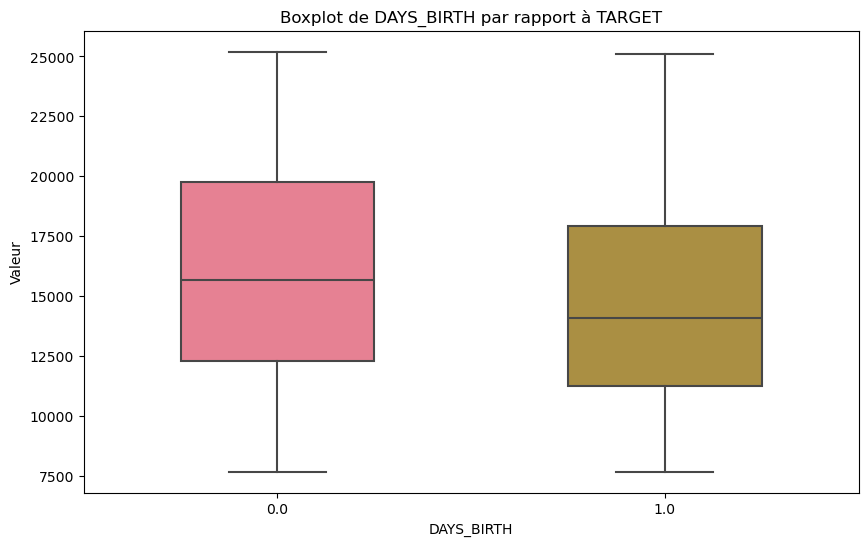

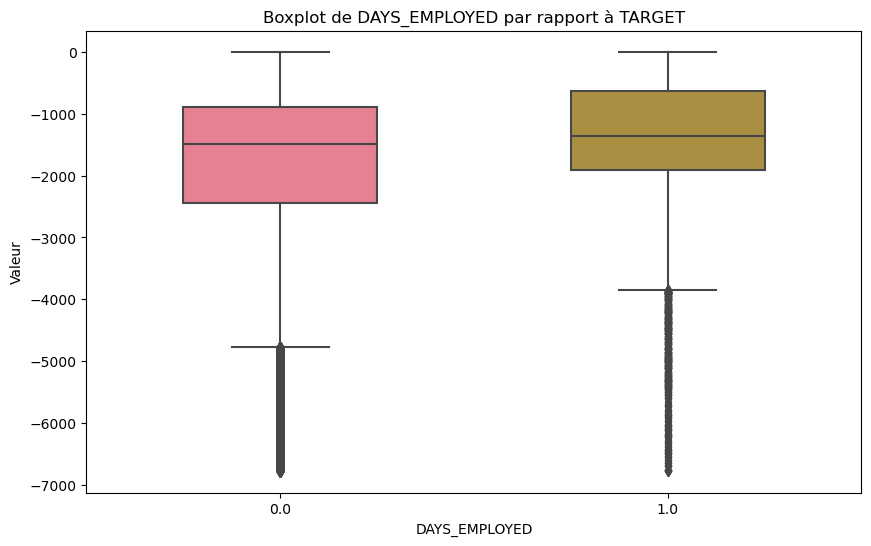

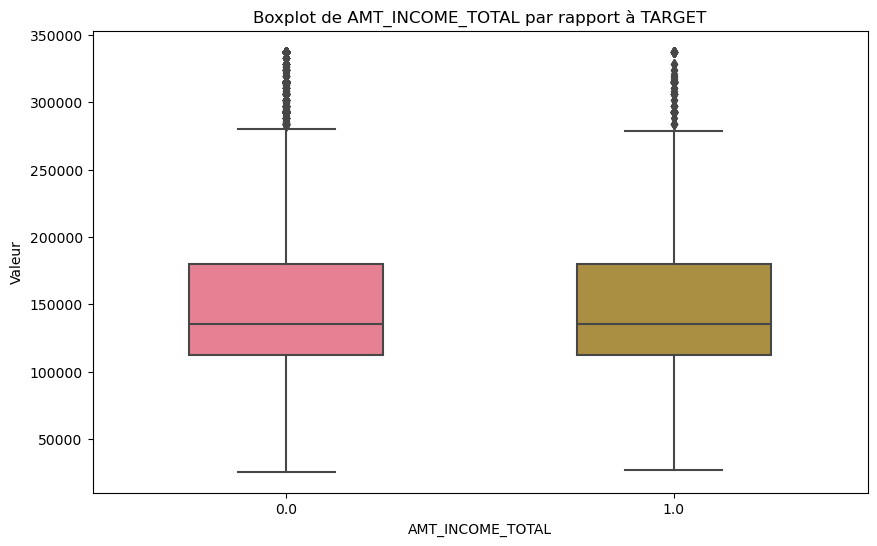

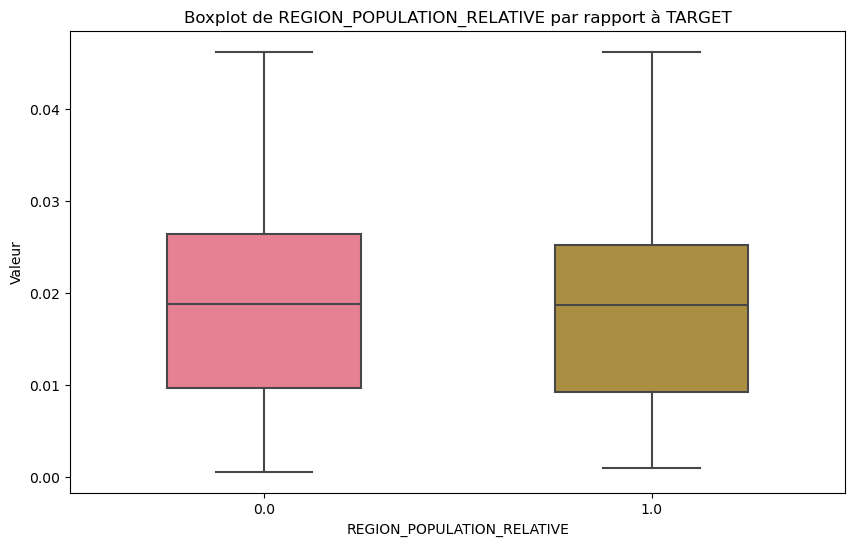

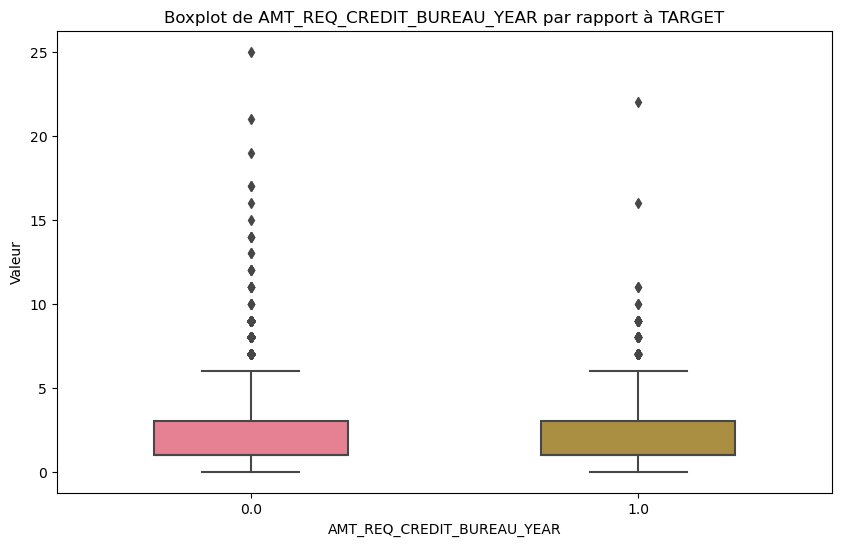

In [77]:
for col in ['AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL',
            'REGION_POPULATION_RELATIVE','AMT_REQ_CREDIT_BUREAU_YEAR']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train, x='TARGET', y=col, width=0.5)
    plt.title(f'Boxplot de {col} par rapport à TARGET')
    plt.xlabel(col)
    plt.ylabel('Valeur')
    plt.show()

In [78]:
train['CODE_GENDER'].unique()

array([0, 1])

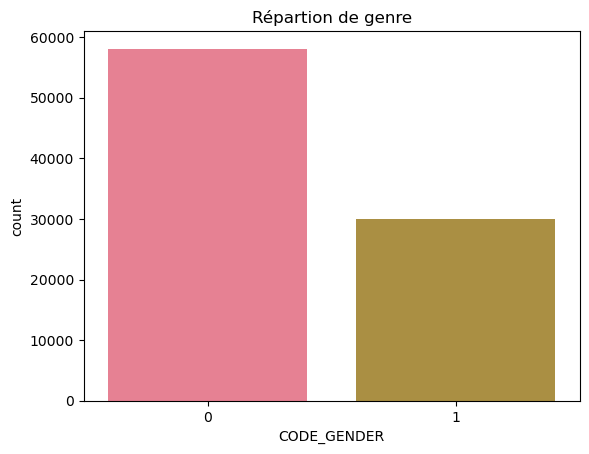

In [79]:
sns.countplot(x=train['CODE_GENDER'])
plt.title(f'Répartion de genre')
plt.xlabel('CODE_GENDER')
plt.ylabel('count')
plt.show()

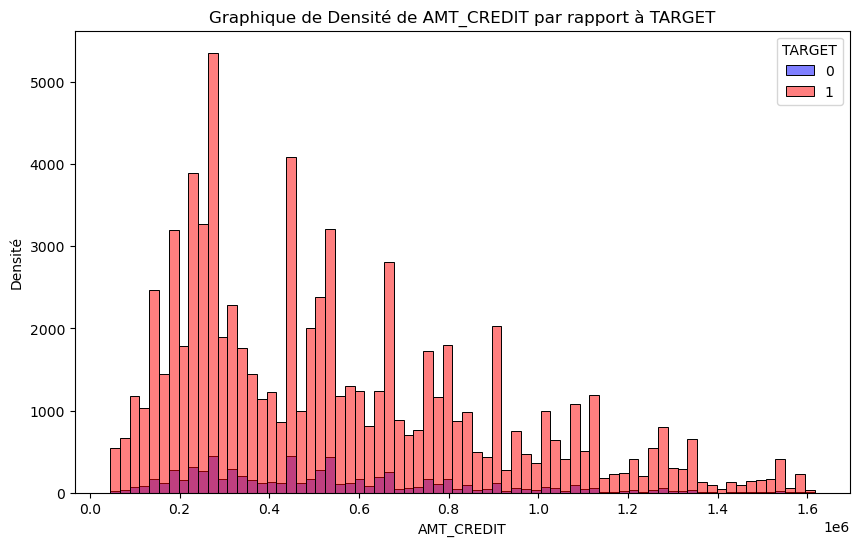

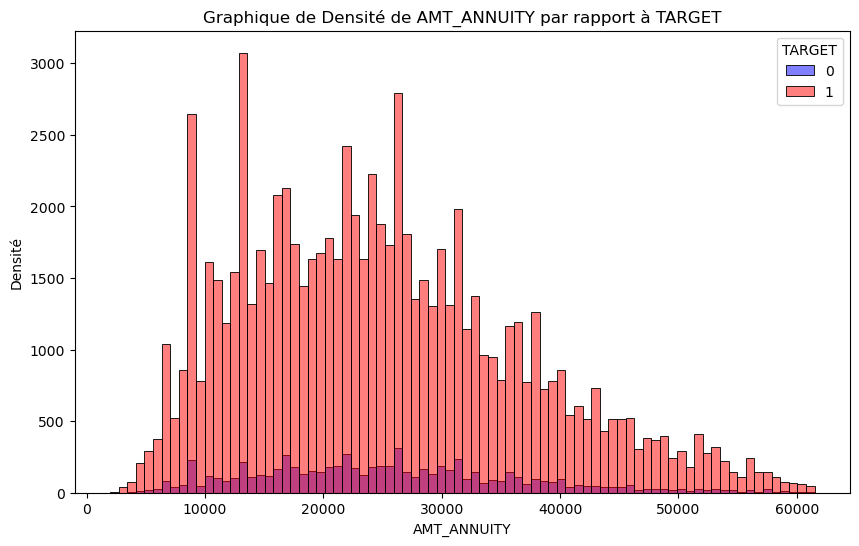

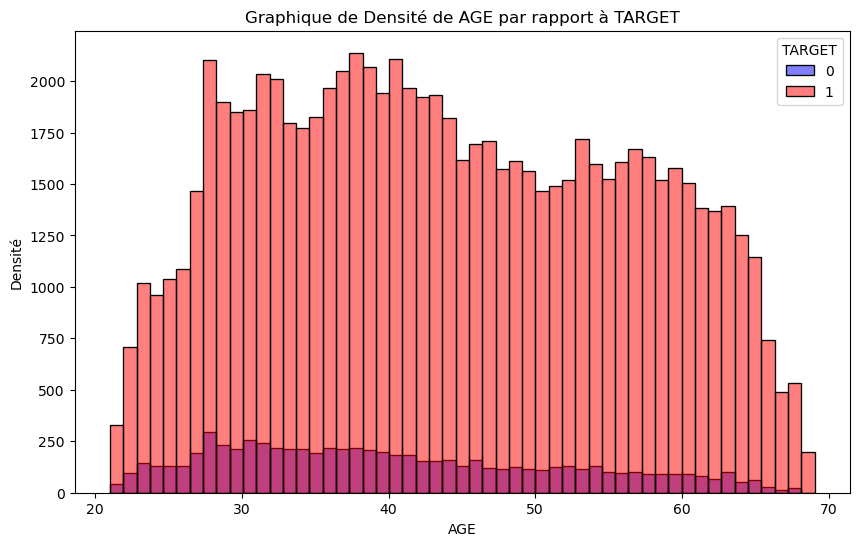

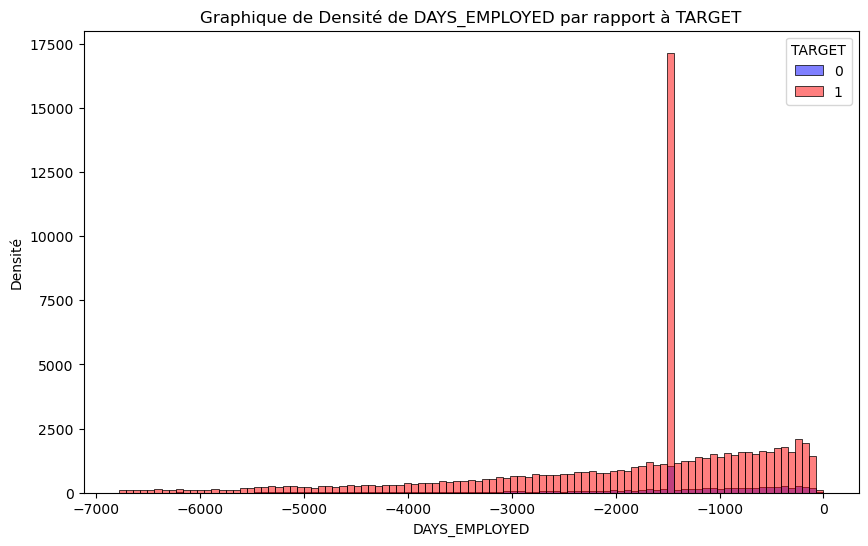

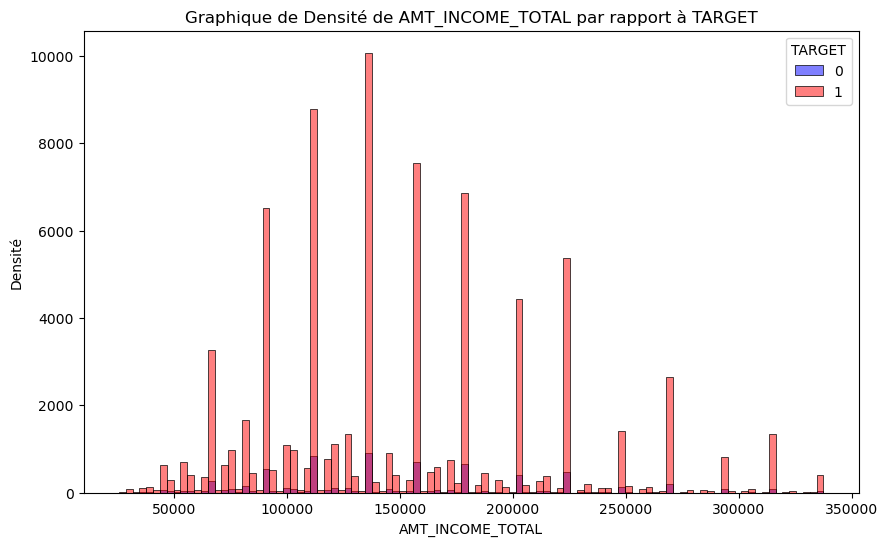

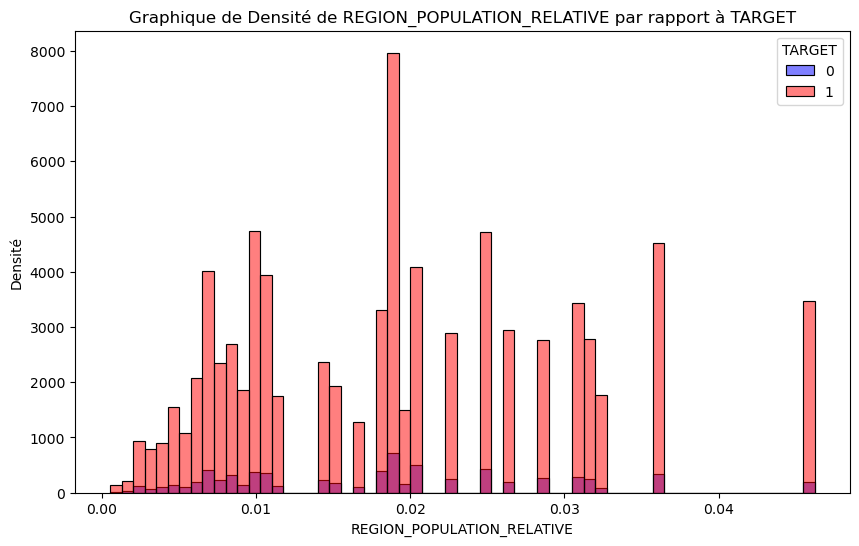

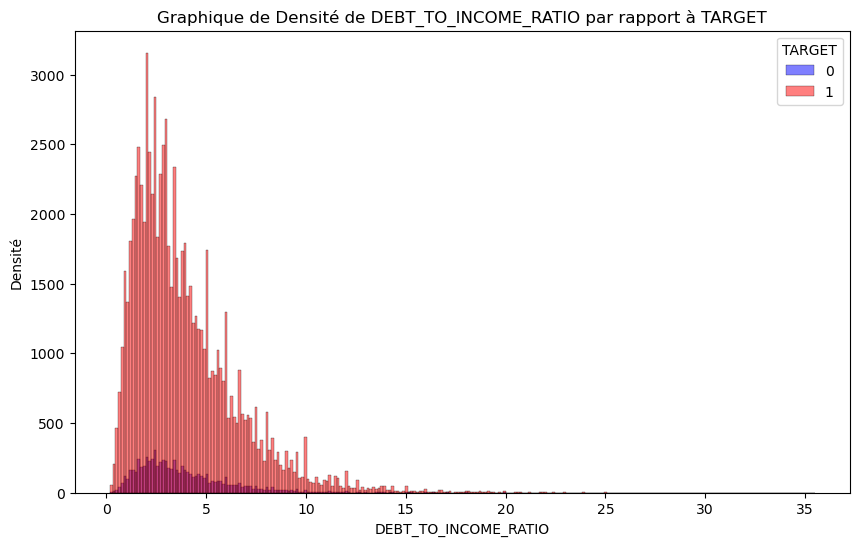

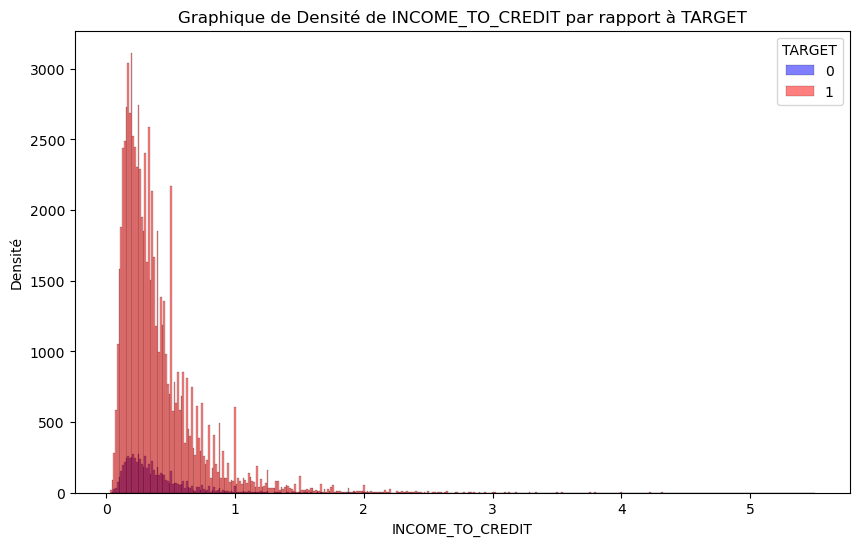

In [80]:
cols_to_plot = [
    'AMT_CREDIT', 'AMT_ANNUITY', 'AGE', 'DAYS_EMPLOYED',
    'AMT_INCOME_TOTAL',  'REGION_POPULATION_RELATIVE','DEBT_TO_INCOME_RATIO', 'INCOME_TO_CREDIT'
   ]

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x=col, hue='TARGET', common_norm=False, fill=True, palette=['red', 'blue'])
    plt.title(f'Graphique de Densité de {col} par rapport à TARGET')
    plt.xlabel(col)
    plt.ylabel('Densité')
    
    # Ajoutez une légende personnalisée
    legend_labels = {'blue': 0, 'red': 1}
    plt.legend(title='TARGET', labels=[legend_labels['blue'], legend_labels['red']], loc='upper right')
    
    plt.show()

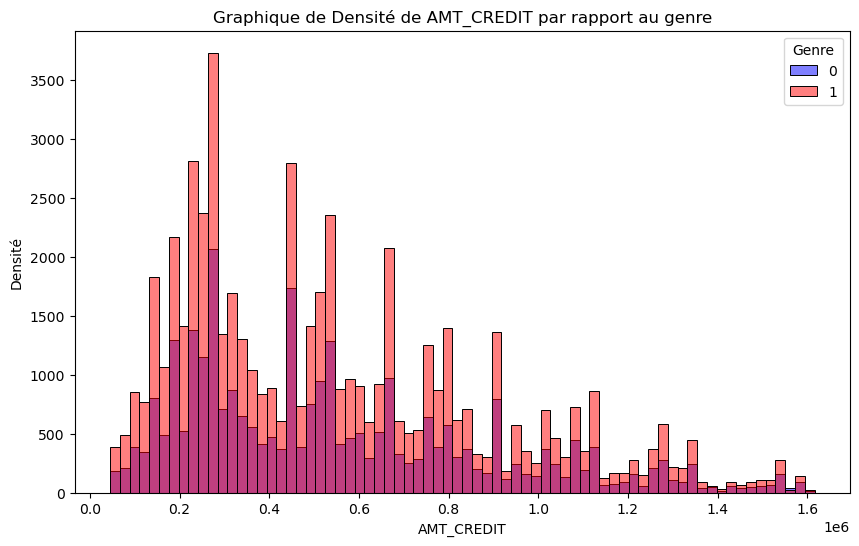

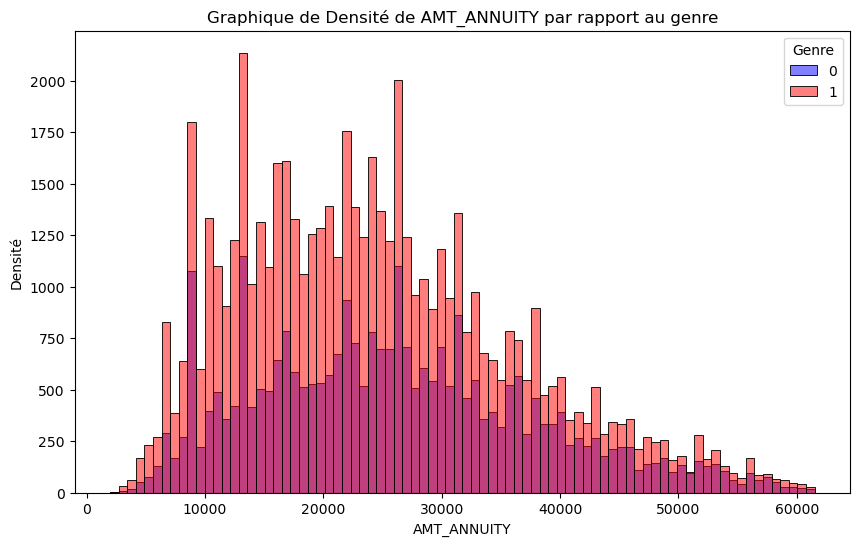

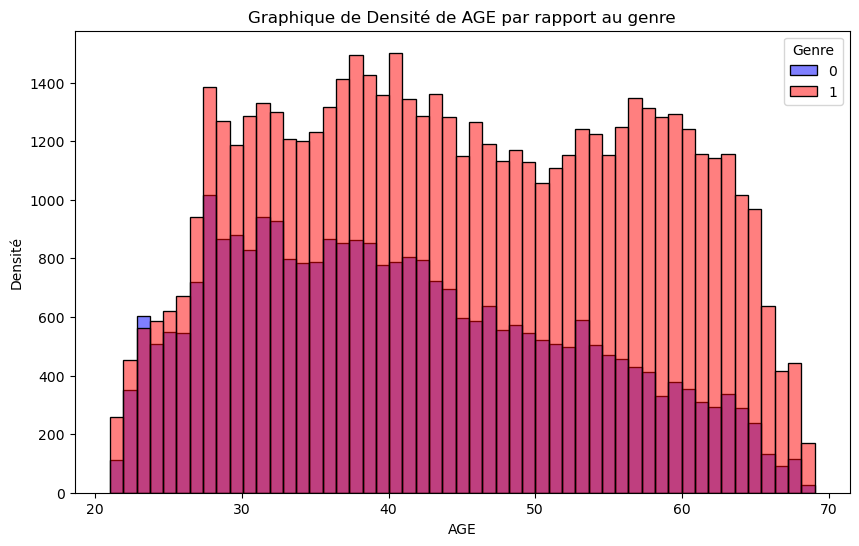

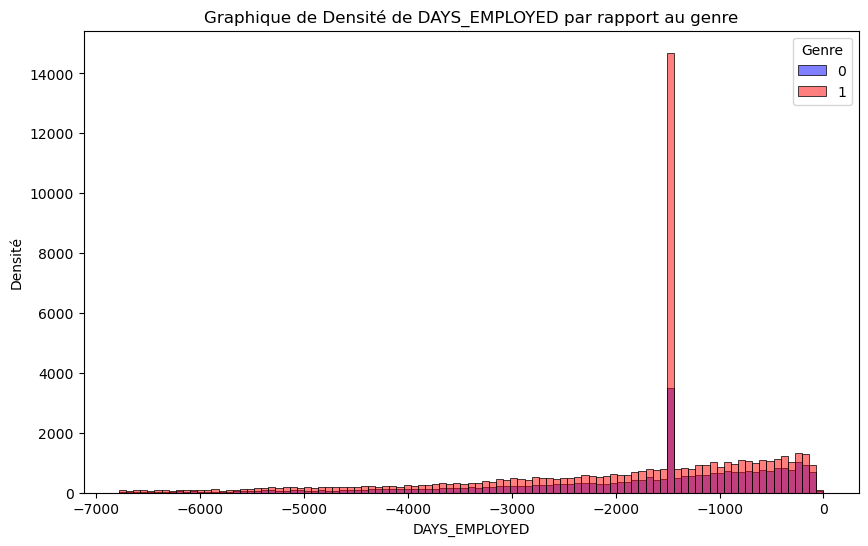

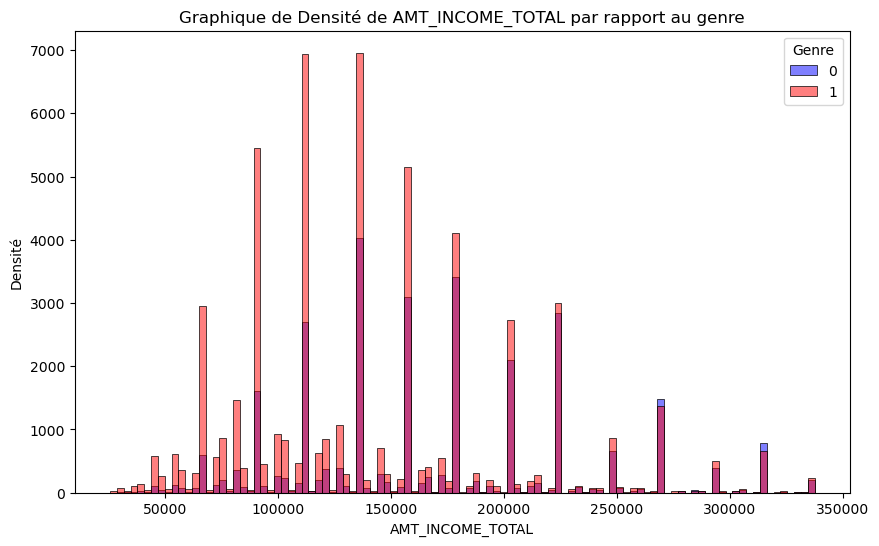

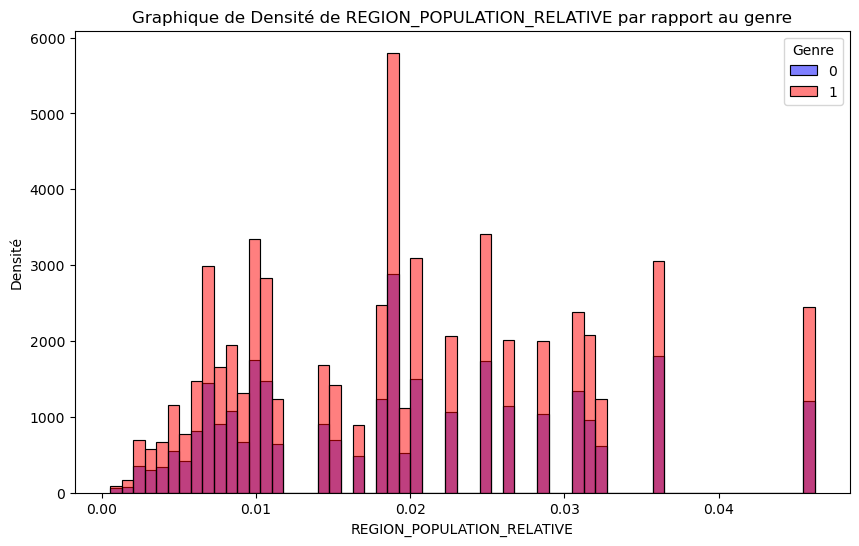

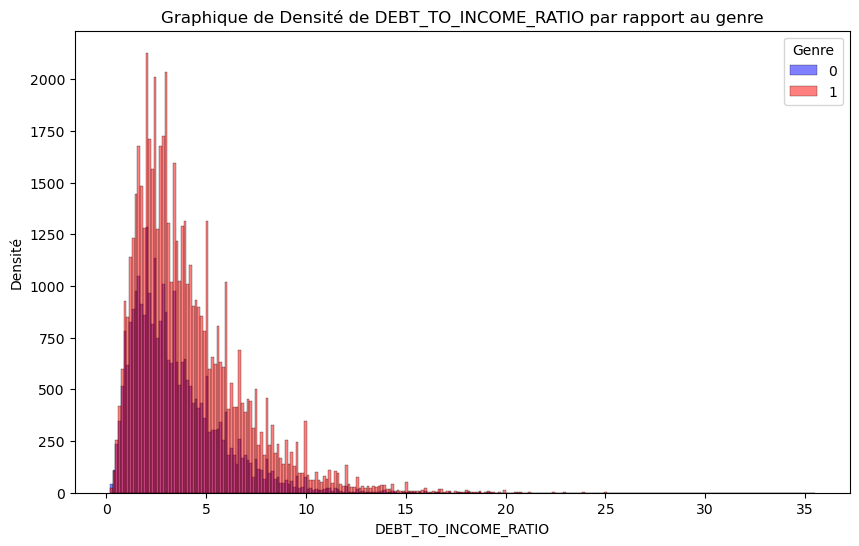

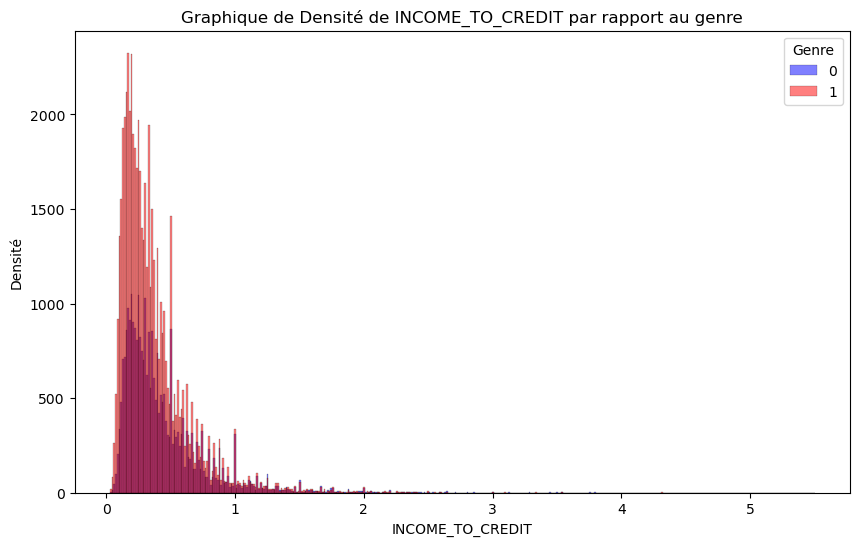

In [81]:
cols_to_plot = [
    'AMT_CREDIT', 'AMT_ANNUITY', 'AGE', 'DAYS_EMPLOYED',
    'AMT_INCOME_TOTAL',  'REGION_POPULATION_RELATIVE','DEBT_TO_INCOME_RATIO', 'INCOME_TO_CREDIT'
   ]

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x=col, hue='CODE_GENDER', common_norm=False, fill=True, palette=['red', 'blue'])
    plt.title(f'Graphique de Densité de {col} par rapport au genre')
    plt.xlabel(col)
    plt.ylabel('Densité')
    
    # Ajoutez une légende personnalisée
    legend_labels = {'blue': 0, 'red': 1}
    plt.legend(title='Genre', labels=[legend_labels['blue'], legend_labels['red']], loc='upper right')
    
    plt.show()